# Times series data -- Data Scientist

This case study consists in **forecasting lounges frequentation** (i.e. the number of guests attending
the lounge per day) for the next 14 days.

Data schema for lounge_attendance.csv:

- date: The date formatted as "YYYY-MM-DD", ranging from 2017-01-01 to 2019-12-29
- lounge_name: The lounge unique id, i.e. "EK", "EL", "EM", "F" and "G"
- total_guests: the daily number of guests in a lounge

where, lounges EK, EL and EM are located in Terminal 2E, lounge F in terminal 2F & lounge G in terminal G.

# PART I: Question 1: - After loading the data, what insights & analysis can you extract from it?

In this first part, I will load, look, manipulate, and analyse the data. The idea is to clean the data for our machine learning models (question 2/3) and to find trend/insights. For this, I will use pandas/numpy for data manipulation and matplotlib/seaborn for data vizualisation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#################################################################
#
#		Select options for plots
#		I will also use seaborn for some plots
#
#################################################################

plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 21
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 21
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=False #use Latex
plt.rcParams['axes.linewidth']=2 #width axes#
plt.rcParams['axes.labelsize']=20 #
plt.rcParams['ytick.labelsize']=16 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=16 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks
plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['figure.titleweight']= 'heavy'


In [2]:
# Read Data into a Dataframe 
df = pd.read_csv('data/lounge_attendance.csv',skiprows=1,names=['date', 'lounge','guests'])

In [3]:
# Let see the data
print(df)

            date lounge  guests
0     2017-01-01     EK    1295
1     2017-01-01     EL    1294
2     2017-01-01     EM     738
3     2017-01-01      F     869
4     2017-01-01      G     128
...          ...    ...     ...
5442  2019-12-29     EK    1527
5443  2019-12-29     EL    1494
5444  2019-12-29     EM    1018
5445  2019-12-29      F    2042
5446  2019-12-29      G     243

[5447 rows x 3 columns]


In [4]:
#Transform data to datetime. It is just because it will be easier to manipulate with Python.
df['date']=pd.to_datetime(df["date"])
print(df.date)

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
5442   2019-12-29
5443   2019-12-29
5444   2019-12-29
5445   2019-12-29
5446   2019-12-29
Name: date, Length: 5447, dtype: datetime64[ns]


In [5]:
# Look at the data
print(df['guests'].describe())

count    5447.000000
mean     1431.225996
std       752.747238
min         4.000000
25%       878.500000
50%      1364.000000
75%      1837.500000
max      3919.000000
Name: guests, dtype: float64


In [6]:
df[df.guests==4]

date lounge  guests
2014 2018-02-07      G       4

In [7]:
df[df.date=='2018-02-07']

date lounge  guests
2010 2018-02-07     EK    1120
2011 2018-02-07     EL     758
2012 2018-02-07     EM     537
2013 2018-02-07      F    1815
2014 2018-02-07      G       4

The number of guests for the other lounges seems normal, maybe that day there was an issue with the terminal G. We will remove the outliers later.

In [8]:
# It is always good to check if there are incorrect values, like NaN
print(df.isna().sum())

date      0
lounge    0
guests    0
dtype: int64


We do not have missing/NaN values. The data are now ready to be analysed.

## Basic Statistics:

Here we will look at the basic statistics like the average, standard deviation, min,max of the total number of guest for each lounge and for the 5 lounges together.

In [9]:
# Basic statistics for the 5 lounges
df['guests'].describe()


count    5447.000000
mean     1431.225996
std       752.747238
min         4.000000
25%       878.500000
50%      1364.000000
75%      1837.500000
max      3919.000000
Name: guests, dtype: float64

The average number of guests for the 5 lounges is 1431, with a standard deviation of 752. The minimum is 4 guests (Terminal G 2018-02-07) while the maximul is 3919.

In [10]:
df[df.guests==df.guests.max()]

date lounge  guests
5190 2019-11-08      F    3919

In [11]:
# Basic statistics for each lounge
lounge_stats = df.groupby('lounge')['guests'].describe()
print(lounge_stats)

         count         mean         std    min     25%     50%      75%  \
lounge                                                                    
EK      1093.0  1707.243367  273.147938  733.0  1524.0  1688.0  1883.00   
EL      1093.0  1432.578225  292.187065  638.0  1218.0  1406.0  1638.00   
EM      1092.0  1022.134615  203.687926  492.0   883.5  1013.0  1158.00   
F       1093.0  2493.444648  591.530569  558.0  2040.0  2523.0  2985.00   
G       1076.0   485.647770  144.527714    4.0   376.0   492.0   599.25   

           max  
lounge          
EK      2641.0  
EL      2291.0  
EM      1737.0  
F       3919.0  
G        813.0  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


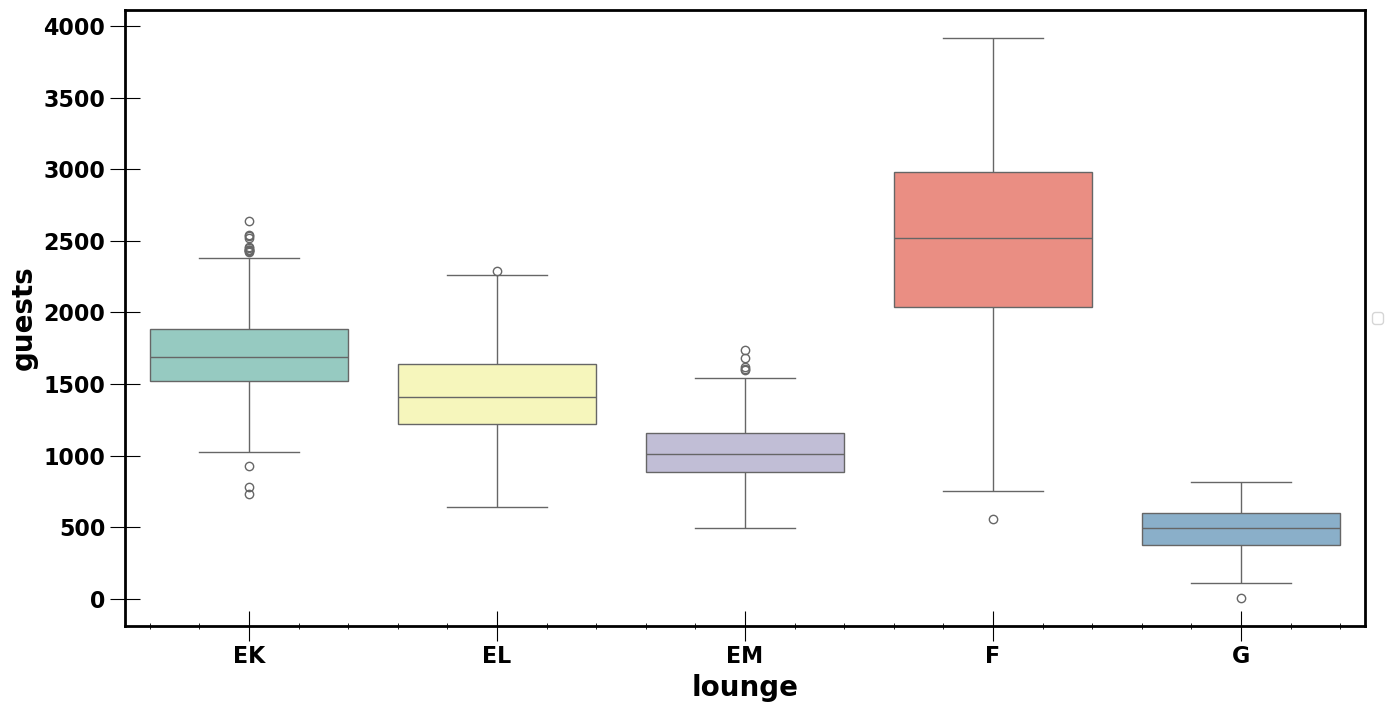

In [12]:
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1 = sn.boxplot(x='lounge', y='guests',hue='lounge', data=df, palette="Set3", linewidth=1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Conclusions**

Lounge F has the highest average attendance (2493 guests per day). The standard deviation is also the highest, i.e., the variability is high too. Also note that the lounge F is the one with the most of amenities (e.g., A "Bistro" counter, Baked goods, etc)

Louge G has the lowest average attendance (486 guests per day).

Lounge EK and EL have consistent average attendance while lounge EM has lowest average attendance. This can be explained by the fact that lounge EM is only opened up to 5pm while the other are open up to 11.30pm.

We see few outliers for the lounge EK and EM. There are days where the number of guests where  higher that the typical range for that lounge. This is maybe because there where external events like flight cancelations/delayed.

We also need more information to understand why the lounge G is underperforming. Is it due to a bad localisation, a smallest space, issues with the amenities? For example, from the AF webpage, lounge G do not have A relaxation area or A Clarins treatment area .

In [13]:
# We will remove the outliers using the interquartile range (IQR) method.  
# The outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. 
# where Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset.

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [14]:
outlier_F=find_outliers_IQR(df[df.lounge=='F'].guests)
outlier_G=find_outliers_IQR(df[df.lounge=='G'].guests)
outlier_EL=find_outliers_IQR(df[df.lounge=='EL'].guests)
outlier_EK=find_outliers_IQR(df[df.lounge=='EK'].guests)
outlier_EM=find_outliers_IQR(df[df.lounge=='EM'].guests)

print('Number of outliers for the lounge F: %0.0f'%np.size(outlier_F))
print('Number of outliers for the lounge G: %0.0f'%np.size(outlier_G))
print('Number of outliers for the lounge EK: %0.0f'%np.size(outlier_EK))
print('Number of outliers for the lounge EL: %0.0f'%np.size(outlier_EL))
print('Number of outliers for the lounge EM: %0.0f'%np.size(outlier_EM))

tot_outlier=np.concatenate([outlier_F.index,outlier_G.index,outlier_EK.index,outlier_EL.index,outlier_EM.index])

Number of outliers for the lounge F: 1
Number of outliers for the lounge G: 1
Number of outliers for the lounge EK: 14
Number of outliers for the lounge EL: 1
Number of outliers for the lounge EM: 5


For each lounge the number of outlier is small, so we can remove those points.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


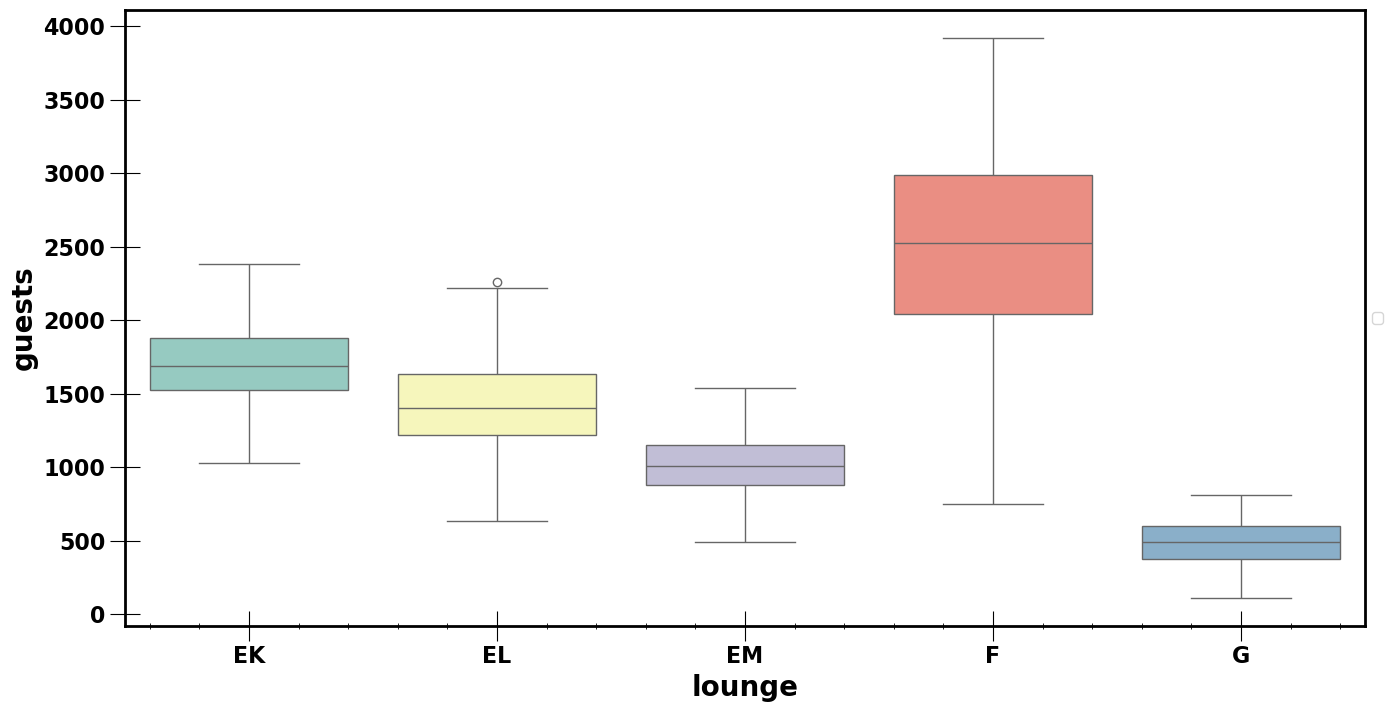

In [15]:
df = df.drop(tot_outlier)
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1 = sn.boxplot(x='lounge', y='guests',hue='lounge', data=df, palette="Set3", linewidth=1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Is there a correlation between the different lounge?

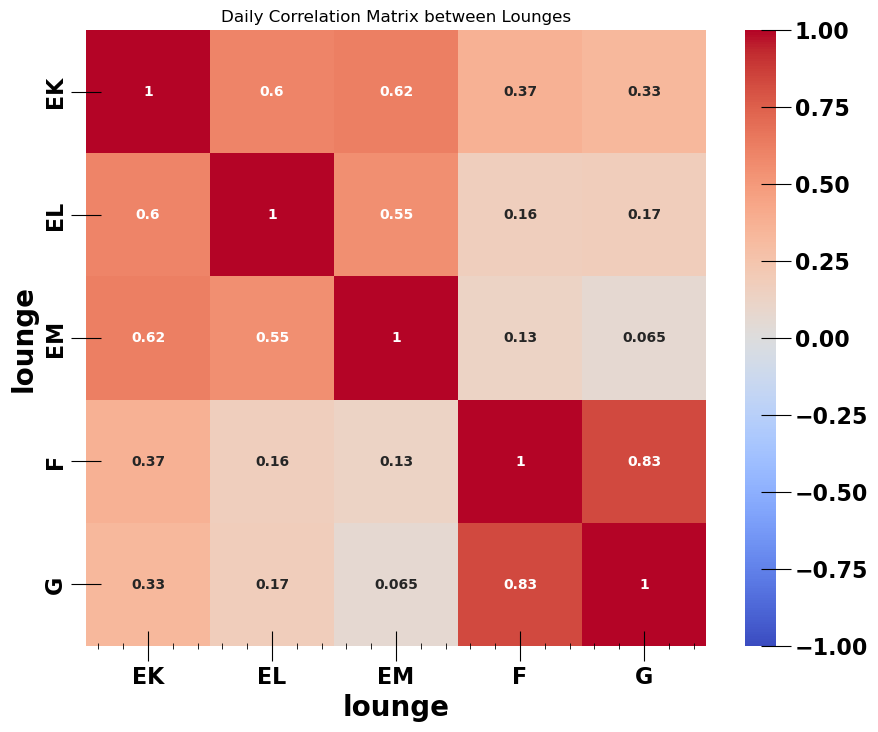

In [16]:
daily_lounge_data = df.pivot(index='date', columns='lounge', values='guests')

# Calculate the correlation matrix 
daily_correlation_matrix = daily_lounge_data.corr()

# Figure
plt.figure(figsize=(10, 8))
sn.heatmap(daily_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Daily Correlation Matrix between Lounges')
plt.show()

**Conclusions**

EK, EL, and EM have moderate correlations with each other (ranging from 0.54 to 0.64), this is because there are all locatated in the same terminal. However, they are slighty independent each other.

F and G show a strong correlation of 0.83, indicating they likely experience similar daily patterns. This is because both terminals are for Schengen Area flights, so they have the same kind of travelers.

For our prediction model, the best is to train our model to the whole data using all the lounges and not to separate by lounge and having 5 models.

## Add new features

The goal is to predict the number of guests. However, to understand better the data, we need to add new features. For example:

-> day: M,Tues,W, Thur,F,Sat,Sun. Depending of the day you can have more or less guest

-> Holidays: Is it a holidays in France?

For this, we use data from the French government which provides information of the french school holidays:
https://www.data.gouv.fr/fr/datasets/vacances-scolaires-par-zones

With pandas, we also add manually the holidays like New year, Christmas, etc...

In [17]:
fr_hol=pd.read_csv('data/vacances.csv')
fr_hol['date']=pd.to_datetime(fr_hol["date"])
df['date']=pd.to_datetime(df["date"])
df=pd.merge(df, fr_hol, how='left', on=['date'])
df = df.drop('nom_vacances', axis=1)


In [18]:
from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar, nearest_workday, Easter, EasterMonday
# French Holidays Calendar
class FranceHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year Day', month=1, day=1),
        Holiday('Labor Day', month=5, day=1),
        Holiday('WW2', month=5, day=8),
        Holiday('Bastille Day', month=7, day=14),
        Holiday('Assumption of Mary', month=8, day=15),
        Holiday('All Saints Day', month=11, day=1),
        Holiday('WW1', month=11, day=11),
        Holiday('Christmas Day', month=12, day=25),
        EasterMonday,
    ]

# Adding French holidays to the dataset
fr_hol = FranceHolidayCalendar()
holidays = fr_hol.holidays(start=df['date'].min(), end=df['date'].max())
df['is_holiday'] = df['date'].isin(holidays)
df['holidays'] = df[['vacances_zone_a', 'vacances_zone_b', 'vacances_zone_c', 'is_holiday']].any(axis=1)
df = df.drop(columns=['vacances_zone_a', 'vacances_zone_b', 'vacances_zone_c', 'is_holiday'])

In [19]:
df['weekday']=df['date'].dt.day_name()
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df[0:10]

date lounge  guests  holidays weekday  day  month  year
0 2017-01-01     EK    1295      True  Sunday    1      1  2017
1 2017-01-01     EL    1294      True  Sunday    1      1  2017
2 2017-01-01     EM     738      True  Sunday    1      1  2017
3 2017-01-01      F     869      True  Sunday    1      1  2017
4 2017-01-01      G     128      True  Sunday    1      1  2017
5 2017-01-02     EK    1551      True  Monday    2      1  2017
6 2017-01-02     EL    1985      True  Monday    2      1  2017
7 2017-01-02     EM     958      True  Monday    2      1  2017
8 2017-01-02      F    1147      True  Monday    2      1  2017
9 2017-01-02      G     205      True  Monday    2      1  2017

## Analyse the total number of guests, all the lounges

In [20]:
# First, we can look at the daily and weekly total attendance
day_guest = df.resample('D', on='date')['guests'].sum()
week_guest= df.resample('W', on='date')['guests'].sum()

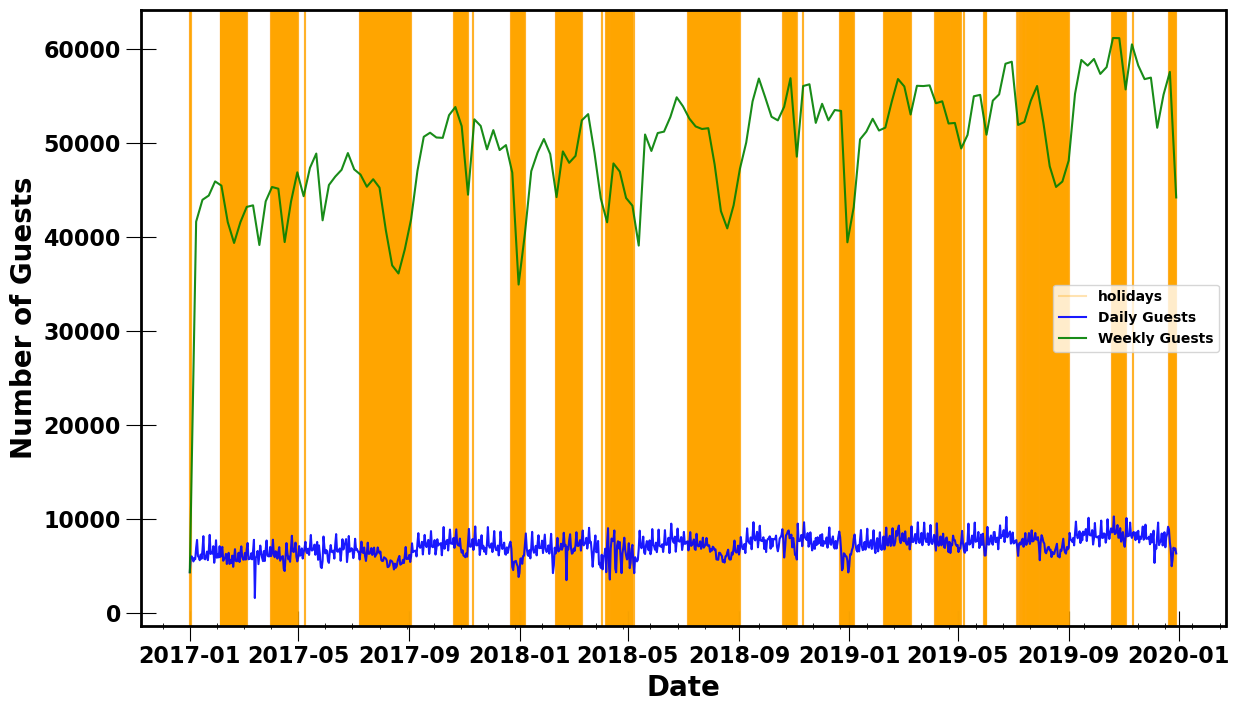

In [21]:

# We plot only the daily and weekly
plt.figure(figsize=(14, 8))

# Add  holiday
holiday_dates = df[df['holidays'] == True]['date']
for holiday in holiday_dates:
    plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3)

plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3,label='holidays')

# Plot daily guests
plt.plot(day_guest.index, day_guest, label='Daily Guests', color='blue', alpha=0.9)
# Plot weekly guests
plt.plot(week_guest.index, week_guest, label='Weekly Guests', color='green', alpha=0.9)



# Adding title and labels
plt.xlabel('Date')
plt.ylabel('Number of Guests')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [22]:
daily_guest = pd.merge(day_guest, df[['date', 'holidays']].drop_duplicates(), on='date', how='left')

daily_average_holidays = daily_guest[daily_guest['holidays']]['guests'].mean()
daily_average_non_holidays = daily_guest[~daily_guest['holidays']]['guests'].mean()
# Display the results
print("Daily average Guests on Holidays: %0.0f "%daily_average_holidays)
print("Daily average Guests on Non-Holidays: %0.0f"%daily_average_non_holidays)


Daily average Guests on Holidays: 6729 
Daily average Guests on Non-Holidays: 7359


**Conclusions:**: 

From the figure, we see a correlation between the total number of guests and the holidays. During holidays, the total number of guests is smaller. This is confirmed by the mean value. The average daily number of guest during holidays is smaller (6768) than the number during non-holidays (7394).



In [23]:
# Is this difference statistically significant? We do a hypothesis testing using a t-test:

from scipy.stats import ttest_ind

# Separate into holidays and non-holidays
holiday_guests =daily_guest[daily_guest['holidays']]['guests']
non_holiday_guests = daily_guest[~daily_guest['holidays']]['guests']
# Perform an independent t-test to compare the means
t_stat, p_value = ttest_ind(holiday_guests, non_holiday_guests)

if p_value<0.05:
    print('We reject the null hypothesis. This means that the difference in average daily guests between holidays and non-holidays is statistically significant')


We reject the null hypothesis. This means that the difference in average daily guests between holidays and non-holidays is statistically significant


### Let look at the daily number of guest with respect to the week day.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


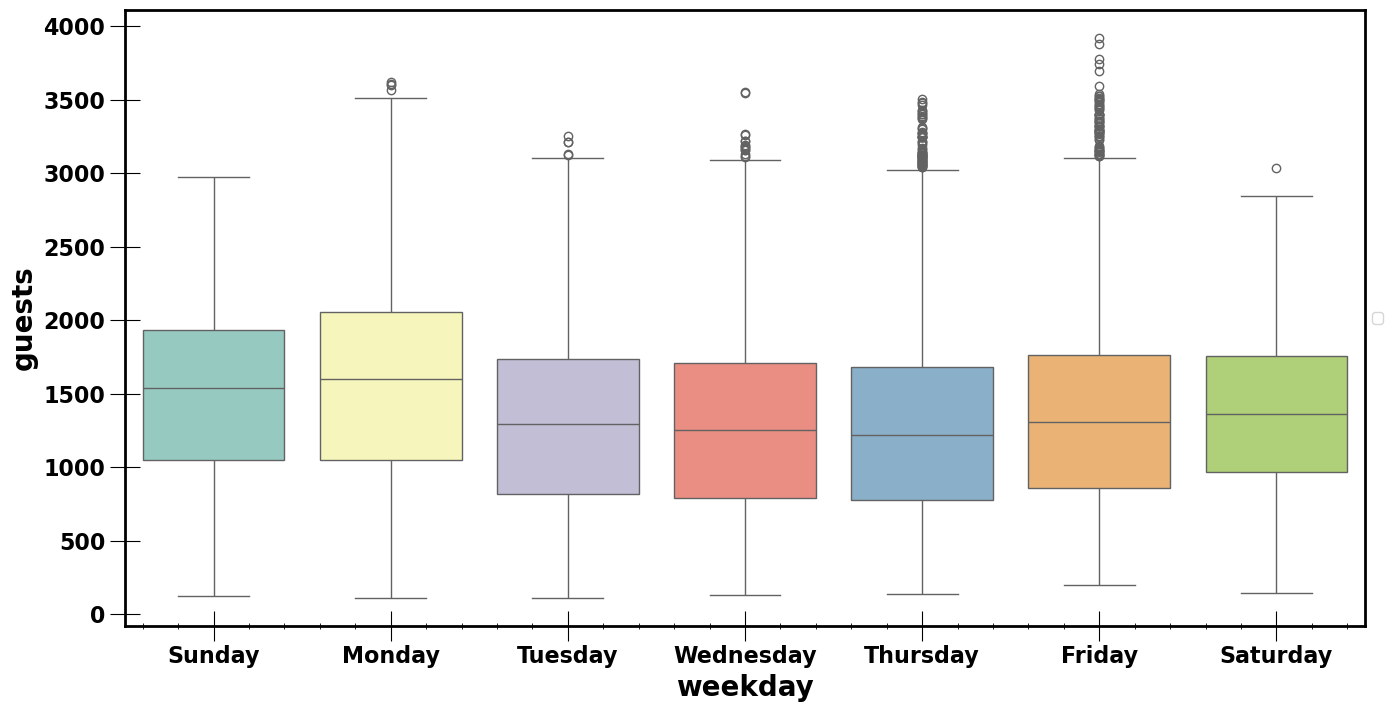

In [24]:
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1 = sn.boxplot(x='weekday', y='guests',hue='weekday', data=df, palette="Set3", linewidth=1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Conclusions:**: 

Mondays have the highest lounge guest number, due to business travelers starting their week.

Fridays and Sundays also have higher attendance maybe due to business travelers finishing their week or starting the new one 1 day early to be on time at their meeting.

Saturdays have the lowest attendance, possibly due a dip in business travel and less frequent leisure travel compared to Sunday.

In [25]:
# Let analyse the monthly total guests
month_guest= df.resample('ME', on='date')['guests'].sum()

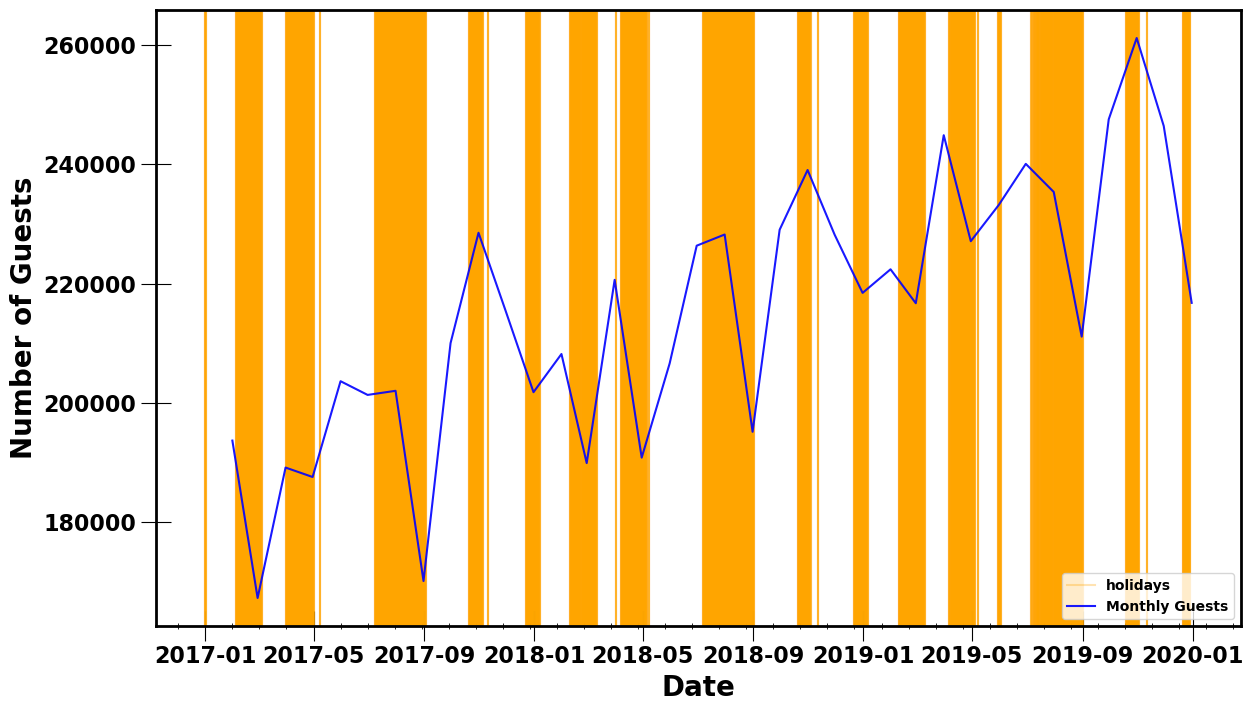

In [26]:
# We plot only the daily and weekly
plt.figure(figsize=(14, 8))

# Add  holiday
holiday_dates = df[df['holidays'] == True]['date']
for holiday in holiday_dates:
    plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3)

plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3,label='holidays')

# Plot daily guests
plt.plot(month_guest.index, month_guest, label='Monthly Guests', color='blue', alpha=0.9)


# Adding title and labels
plt.xlabel('Date')
plt.ylabel('Number of Guests')

# Adding legend
plt.legend()

# Display the plot
plt.show()

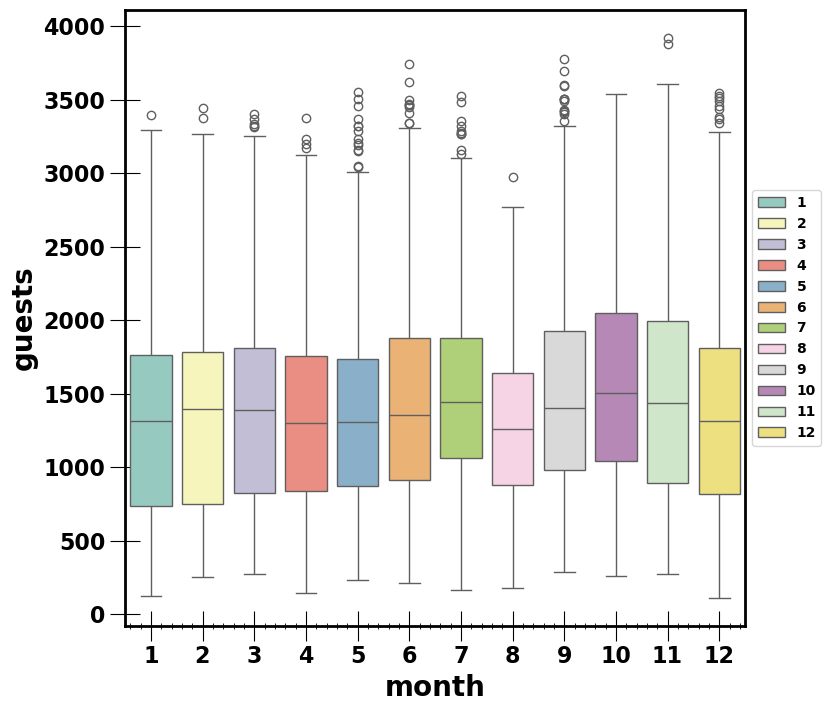

In [27]:

fig, ax1 = plt.subplots(figsize=(8,8), facecolor='w', edgecolor='k')
ax1 = sn.boxplot(x='month', y='guests',hue='month', data=df, palette="Set3", linewidth=1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [28]:
#Let check the number
df[['guests','month']].groupby('month').sum()

guests
month        
1      624357
2      573981
3      654755
4      605588
5      643512
6      667857
7      665708
8      576480
9      686688
10     728842
11     690184
12     637093

**Conclusions:**: 

From the figure, we see that the daily average number of guest during August is lower than other month. If we look at the total guest during the whole month, we find 576480 guests for August, i.e., 94,252 fewer guests than July. One explication can be that people using lounge generally are people travelling for work not leisure.

For 2017, 2018, 2019, the total number of guest increase in October. In the figure, where the monthly attendance is shown, we see clearly 3 peaks where the maximum occurs November 1st of each year. This means that the number of guests increase a lot during Octuber. This confirms by the fact that October (including the 3 years) have the largest number of guests (742929). One explanation could be not a lot of meeting are planned just after summer holidays but you have to wait few weeks when all the projects are more mature.

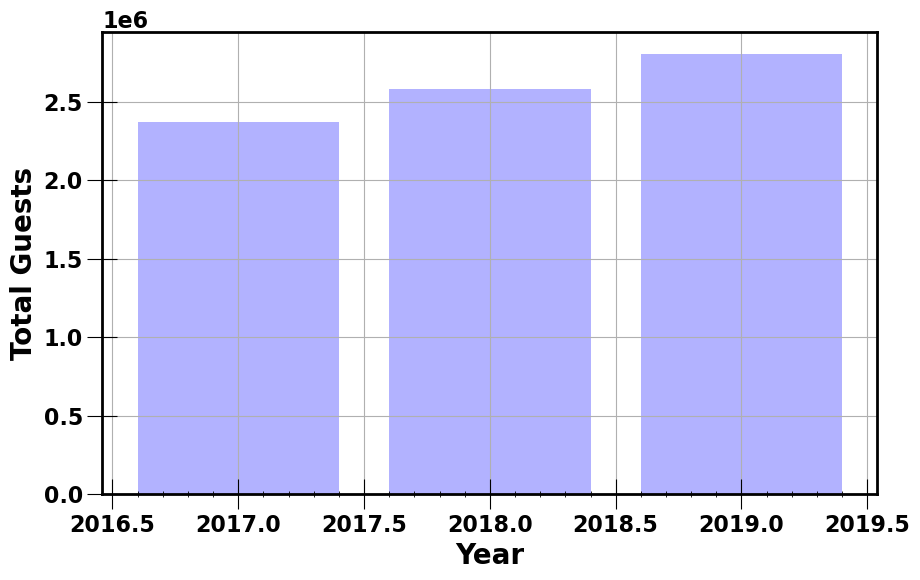

In [29]:
# Let analyse the yearly total guests
year_guest= df.resample('YE', on='date')['guests'].sum()

# Plot Yearly Total Guests Comparison
plt.figure(figsize=(10, 6))
plt.bar((year_guest.index.year), year_guest, color='blue',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

**Conclusions:**: 

From the figure, we see that the yearly number of guest increase between 2017 and 2019. This is consistent with the fact that the number of travalers also increase during the same epoch. Also, all those data are before Covid.

## Analyse the number of guests in the different lounges

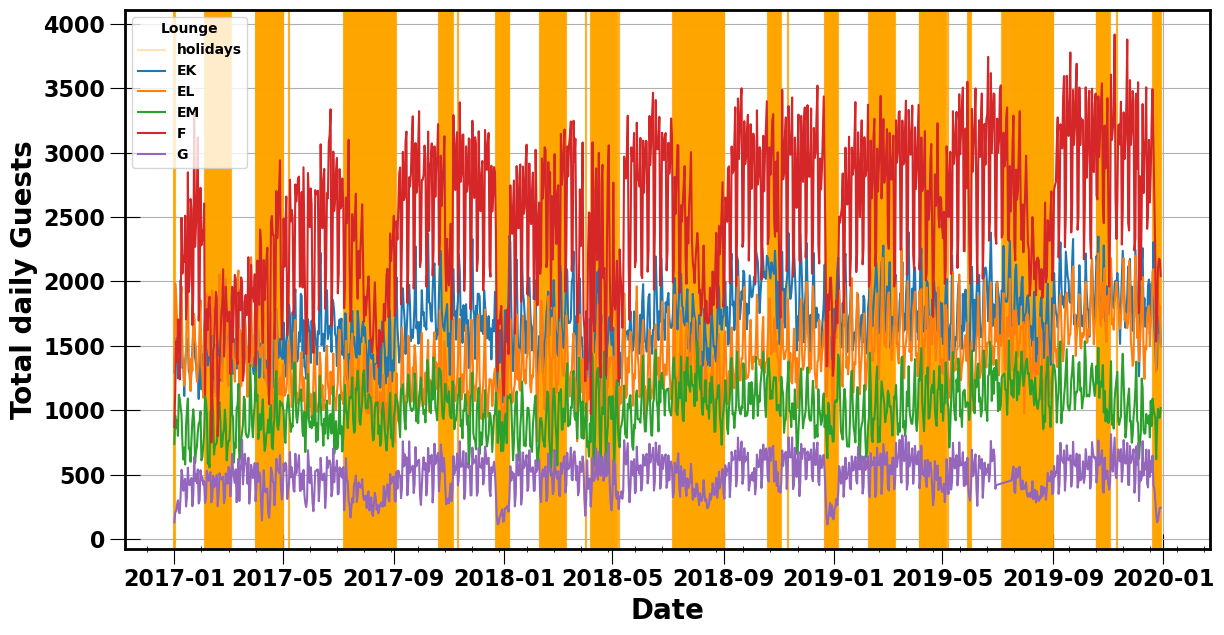

In [30]:
plt.figure(figsize=(14, 7))

# Add  holiday
holiday_dates = df[df['holidays'] == True]['date']
for holiday in holiday_dates:
    plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3)


plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3,label='holidays')

sn.lineplot(data=df, x='date', y='guests', hue='lounge', marker='None')

plt.xlabel('Date')
plt.ylabel('Total daily Guests')
plt.legend(title='Lounge')
plt.grid(True)
plt.show()


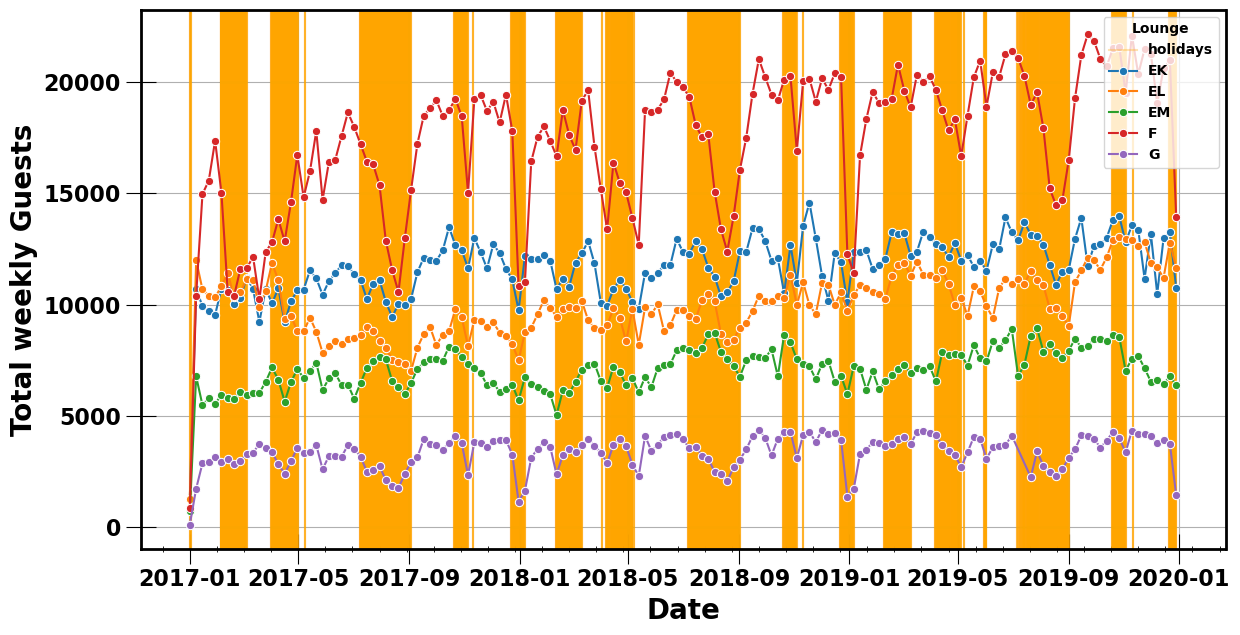

In [31]:
# Aggregate daily total guests by lounge
weekly_lounge_guests = df.groupby([pd.Grouper(key='date', freq='W'), 'lounge'])['guests'].sum().reset_index()

plt.figure(figsize=(14, 7))

# Add  holiday
holiday_dates = df[df['holidays'] == True]['date']
for holiday in holiday_dates:
    plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3)

plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3,label='holidays')

sn.lineplot(data=weekly_lounge_guests, x='date', y='guests', hue='lounge', marker='o')

plt.xlabel('Date')
plt.ylabel('Total weekly Guests')
plt.legend(title='Lounge')
plt.grid(True)
plt.show()


In [32]:
lounge_f = df[df['lounge'] == 'F'].groupby('holidays')['guests'].mean().reset_index()
lounge_g = df[df['lounge'] == 'G'].groupby('holidays')['guests'].mean().reset_index()
lounge_ek = df[df['lounge'] == 'EK'].groupby('holidays')['guests'].mean().reset_index()
lounge_el = df[df['lounge'] == 'EL'].groupby('holidays')['guests'].mean().reset_index()
lounge_em = df[df['lounge'] == 'EM'].groupby('holidays')['guests'].mean().reset_index()

print('Difference  average daily number of guests in lounge F during holidays: %0.0f'%lounge_f.diff().guests[1])
print('Difference average daily number of guests in lounge G during holidays: %0.0f'%lounge_g.diff().guests[1])
print('Difference average daily number of guests in lounge EK during holidays: %0.0f'%lounge_ek.diff().guests[1])
print('Difference average daily number of guests in lounge EL during holidays: %0.0f'%lounge_el.diff().guests[1])
print('Difference average daily number of guests in lounge EM during holidays: %0.0f'%lounge_em.diff().guests[1])

Difference  average daily number of guests in lounge F during holidays: -454
Difference average daily number of guests in lounge G during holidays: -124
Difference average daily number of guests in lounge EK during holidays: -72
Difference average daily number of guests in lounge EL during holidays: -7
Difference average daily number of guests in lounge EM during holidays: 28


**Conclusion**

From the figure, we see that the lounge in terminal F is the most affected by holidays. During holidays, at lounge F there is in average 450 guests less than not during holidays. The other terminal seems less affected with a difference of 123, 78, 5 for G, EK, EL. Unlike the others lounges, during holidays there is more guests at the lounge EM. Lounge EM has a kid area maybe explaning why there are more guests during holidays.

Terminal 2F (2G too) is mainly for flights within the Schengen Area, so more for business trips. This is why during holidays the number of guests decreases significantly.

Note that lounges F, EK, and EL have more guests on average, this can due to a higher demand, a better localisation, more available space.

Also, it seems that the dips are bigger during Christmas and Summer holidays. This is because there are international holidays, while winter/spring holidays are differents for all the countries.

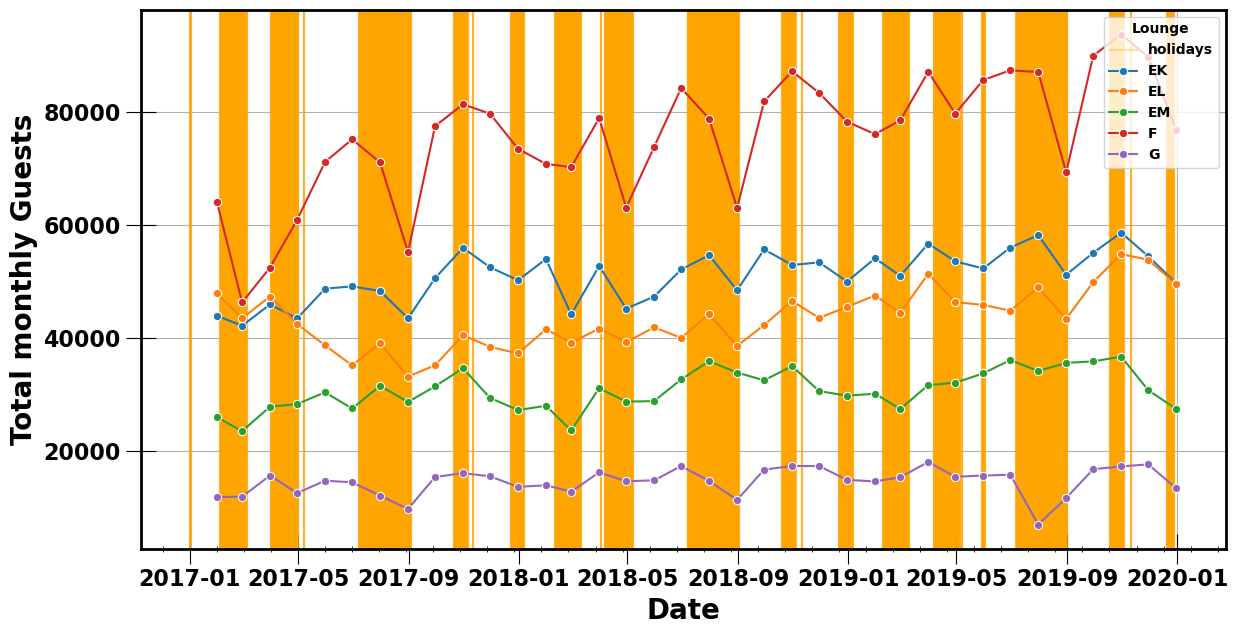

In [33]:
# Aggregate daily total guests by lounge
monthly_lounge_guests = df.groupby([pd.Grouper(key='date', freq='ME'), 'lounge'])['guests'].sum().reset_index()

plt.figure(figsize=(14, 7))

# Add  holiday
holiday_dates = df[df['holidays'] == True]['date']
for holiday in holiday_dates:
    plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3)

plt.axvline(x=holiday, color='orange', linestyle='-', alpha=0.3,label='holidays')

sn.lineplot(data=monthly_lounge_guests, x='date', y='guests', hue='lounge', marker='o')

plt.xlabel('Date')
plt.ylabel('Total monthly Guests')
plt.legend(title='Lounge')
plt.grid(True)
plt.show()

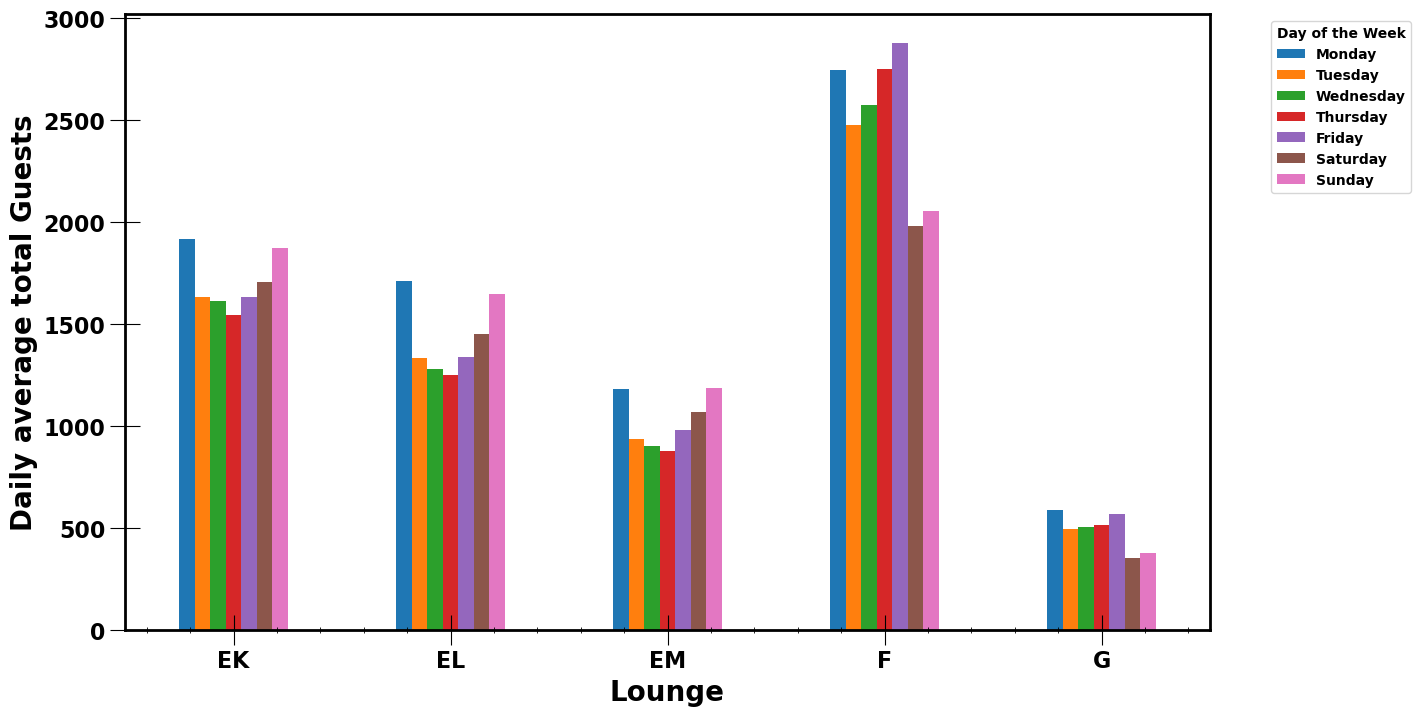

In [34]:
# Group by lounge name and day of the week to analyze trends
guest_day_and_lounge = df.groupby(['lounge', 'weekday'])['guests'].mean().unstack()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
guest_day_and_lounge = guest_day_and_lounge[ordered_days]

# Plotting the trends for each lounge
guest_day_and_lounge.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Lounge')
plt.ylabel('Daily average total Guests')
plt.xticks(rotation=0)
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Conclusions**

Lounge F is used on business days like Monday and Friday.

EK,EL,EM are mostly used at the beginning of the week and weekend.

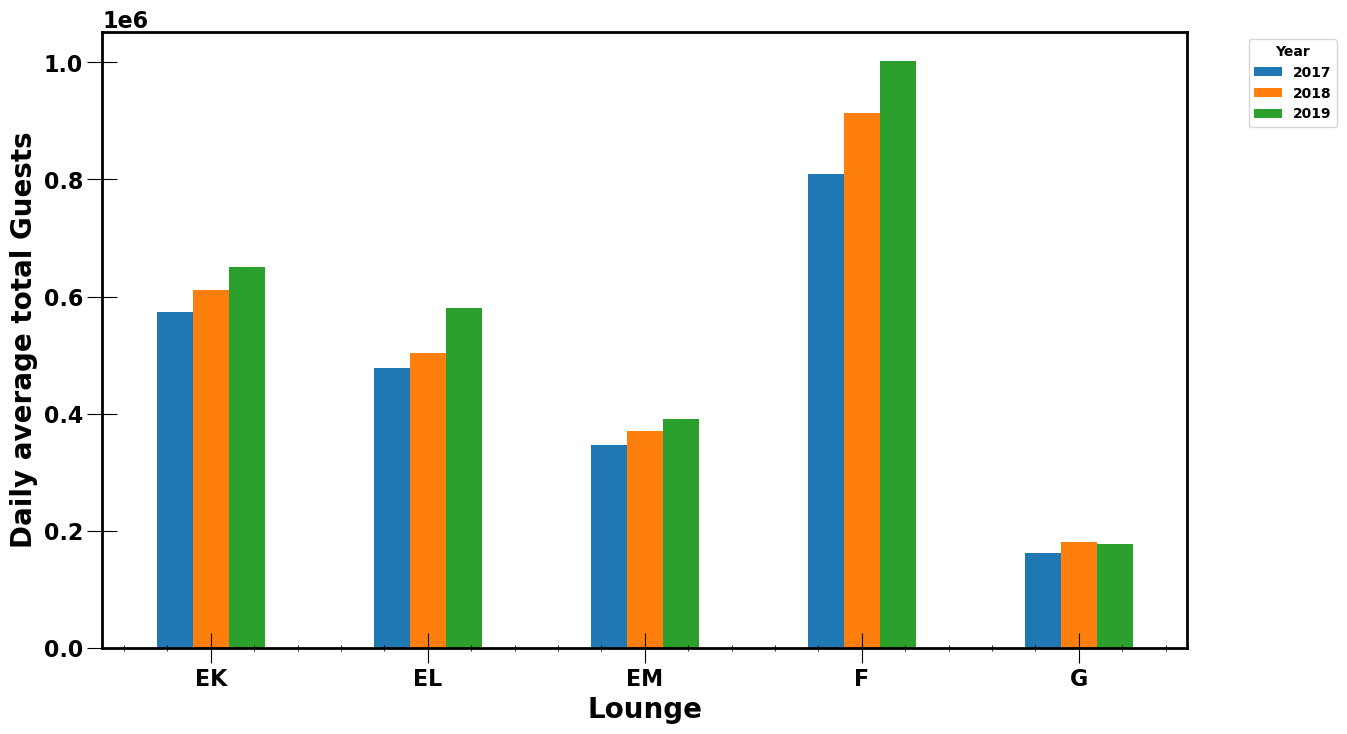

In [35]:
# Group by lounge name and day of the week to analyze trends
guest_year_and_lounge = df.groupby(['lounge', 'year'])['guests'].sum().unstack()

# Plotting the trends for each lounge
guest_year_and_lounge.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Lounge')
plt.ylabel('Daily average total Guests')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
total_guests_per_year_and_lounge = df.groupby([df['date'].dt.year, 'lounge'])['guests'].sum().unstack()

guests_2017 = total_guests_per_year_and_lounge.loc[2017]
guests_2018 = total_guests_per_year_and_lounge.loc[2018]
guests_2019 = total_guests_per_year_and_lounge.loc[2019]

# Calculate the percentage growth
percentage_growth_2017_2018 = (guests_2018 - guests_2017) / guests_2017 * 100
percentage_growth_2018_2019 = (guests_2019 - guests_2018) / guests_2018 * 100

print(percentage_growth_2017_2018)
print(percentage_growth_2018_2019)

lounge
EK     6.298586
EL     5.382308
EM     7.011608
F     13.025197
G     11.306161
dtype: float64
lounge
EK     6.618534
EL    15.188764
EM     5.672863
F      9.576862
G     -1.883528
dtype: float64


**Conclusions**

The total number of guests across the three years (2017, 2018, and 2019) increase except for G. However the growth rate change for the different lounge.

-> Lounge F has the highest increase every year, around 10% but in the 2019 the growth was smaller than in 2018.

-> The growth rate for EL increase between 2018 and 2019 (5% to 15%) while for EK it is the inverse (10% to 4%), maybe indicating that travelers from EK are now going to EL. EM have a steady growth with a rate of 7% every year.

-> For Lounge G the growth rate decreased from 11% to -2% between 2018 and 2019 indicating that this lounge is less used.

# Take away

**General insights**

The overall use of the lounges is strongly correlated with the holidays. The number of guest decreases during holidays. August being the month with less guests.

We see three peak corresponding to October. During this month the number of guest increase. This can be due to the fact that we need to wait a few weeks after the summer break to start meeting and business trip.

The overal number of guests increase between 2017-2019

**Individual Lounge insights**

F and G show a strong correlation of 0.83, indicating they likely experience similar daily patterns. This is because both terminals are for Schengen Area flights, so they have the same kind of travelers.

Lounge F (to a lesser extent G) is the most affected by holidays because terminal F and G are mainly for flights within the Schengen Area, so more for business trips. 

Lounges F, EK, and EL have more guests on average, this can due to a higher demand, a better localisation, or more available space.


Lounge F is used on business days like Monday and Friday.

EK,EL,EM are mostly used at the beginning of the week and weekend.


Lounge F has the highest increase every year, around 10% but in the 2019 the growth was smaller than in 2018.

The growth rate for EL increase between 2018 and 2019 (5% to 15%) while for EK it is the inverse (10% to 4%), maybe indicating that travelers from EK are now going to EL. EM have a steady growth with a rate of 7% every year.

For Lounge G the growth rate decreased from 11% to -2% between 2018 and 2019 indicating that this lounge is less used.

**Information regarding the different amenities can explain the difference between lounge like kid area, spa, foods, opening hours, etc** 



# PART II: Train one or several models that address the problem, your model(s) must predict, for each day and for each lounge, the total number of guests

In the Part II, I will train several models to predict the lounges frequentation. To understand better the cleaning or new features added, please, refer to the first notebook. Here, I will put explanations only for the models not for the data cleaning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar, nearest_workday, EasterMonday
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Function to use my plotting configuration
def configuration_plot():
    plt.rcParams.update({
        'legend.numpoints': 1,
        'xtick.major.size': 21,
        'xtick.minor.size': 5,
        'ytick.major.size': 21,
        'ytick.minor.size': 5,
        'xtick.minor.visible': True,
        'text.usetex': False,
        'axes.linewidth': 2,
        'axes.labelsize': 20,
        'ytick.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.direction': 'inout',
        'xtick.direction': 'inout',
        'xtick.major.top': True,
        'xtick.major.bottom': True,
        'xtick.minor.top': True,
        'xtick.minor.bottom': True,
        'ytick.major.left': True,
        'ytick.major.right': True,
        'ytick.minor.left': True,
        'ytick.minor.right': True,
        'font.weight': 'bold',
        'axes.labelweight': 'heavy',
        'figure.titleweight': 'heavy'
    })


In [3]:
# Add individual French holidays
class FranceHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year Day', month=1, day=1),
        Holiday('Labor Day', month=5, day=1),
        Holiday('WW2', month=5, day=8),
        Holiday('Bastille Day', month=7, day=14),
        Holiday('Assumption of Mary', month=8, day=15),
        Holiday('All Saints Day', month=11, day=1),
        Holiday('WW1', month=11, day=11),
        Holiday('Christmas Day', month=12, day=25),
        EasterMonday,
    ]

In [4]:
# Load the data and add holidays columns.
def load_and_preprocess_data(lounge_file, holidays_file, path='data/'):
    # Load lounge attendance data
    lounge_data_path = f'{path}{lounge_file}.csv'
    lounge_df = pd.read_csv(lounge_data_path, skiprows=1, names=['date', 'lounge', 'guests'])
    lounge_df['date'] = pd.to_datetime(lounge_df['date'])

    # Load holidays data
    holidays_data_path = f'{path}{holidays_file}.csv'
    holidays_df = pd.read_csv(holidays_data_path)
    holidays_df = holidays_df.drop('nom_vacances', axis=1)
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])

    # Add holiday column, true/false if any zone (A,B,C) is in holidays
    holidays_df['holidays'] = holidays_df[['vacances_zone_a', 'vacances_zone_b', 'vacances_zone_c']].any(axis=1)
    holidays_df = holidays_df.drop(columns=['vacances_zone_a', 'vacances_zone_b', 'vacances_zone_c'])

    # Adding French holidays
    fr_holidays = FranceHolidayCalendar().holidays(
        start=lounge_df['date'].min(), end=lounge_df['date'].max())
    holidays_df['holidays'] = holidays_df['date'].isin(fr_holidays)

    # Use pivot function to rewrite the data 
    lounge_df = lounge_df.pivot(index='date', columns='lounge', values='guests')

    # Merge lounge attendance with holidays
    df = pd.merge(lounge_df, holidays_df, on='date', how='left')
    df['holidays'] = df['holidays'].astype(int)

    return df,holidays_df

In [5]:
#We will remove outlier using IQR method and include this step into a Pipeline

class IQR_outlier(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.outliers_removed = {}  # Stores number of outliers removed per column
        self.outliers_indices = {}  # Stores indices of removed outliers per column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.remove_outliers_iqr_selected_columns(X, self.columns)

    def remove_outliers_iqr(self, df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices = outliers.index.tolist()
        
        # Filter out outliers
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        # Record the number of outliers and their indices
        self.outliers_removed[column] = len(outlier_indices)
        self.outliers_indices[column] = outlier_indices
        
        return df_filtered

    def remove_outliers_iqr_selected_columns(self, df, columns):
        df_copy = df.copy()
        for column in columns:
            df_copy = self.remove_outliers_iqr(df_copy, column)
        return df_copy

    def get_outliers_removed(self):
        return self.outliers_removed

    def get_outliers_indices(self):
        return self.outliers_indices

In [6]:
# Function to add features to our dataframe like weekday, day, etc.
# One can also add information regarding the lounges (e.g. kids area, food, hours)
def add_features(X):
    X['weekday'] = X['date'].dt.weekday
    X['day'] = X['date'].dt.day
    X['month'] = X['date'].dt.month
    X['year'] = X['date'].dt.year
    X = X.drop(columns=['date'])  # Drop the original 'date' column after feature extraction
    return X

In [7]:
# Class to create lagged features. New features are based on the previous values of the time series. Max_lag is the number of previous time steps
# we include as features.
class LagFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, max_lag=5):
        self.columns = columns
        self.max_lag = max_lag

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.create_lagged_features_selected_columns(X, self.columns, self.max_lag)

    @staticmethod
    def create_lagged_features_selected_columns(df, columns, max_lag):
        df_copy = df.copy()
        lagged_data = pd.DataFrame(index=df.index)
        for col in columns:
            for lag in range(1, max_lag + 1):
                lagged_data[f'{col}_lag{lag}'] = df_copy[col].shift(lag)
        return pd.concat([df_copy, lagged_data], axis=1).dropna()

In [8]:
# Class to scale our features and return as a dataframe, not a array.
class DataFrameStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_columns=None):
        self.exclude_columns = exclude_columns
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.columns_to_scale = X.columns.difference(self.exclude_columns)
        self.scaler.fit(X[self.columns_to_scale], y)
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns_to_scale] = self.scaler.transform(X_copy[self.columns_to_scale])
        return X_copy
    def inverse_transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns_to_scale] = self.scaler.inverse_transform(X_copy[self.columns_to_scale])
        return X_copy

In [9]:
# Model training and evaluation/visualisation and prediction
def train_and_evaluate_model(df, df_holidays,lounges,max_lag,alpha=1.0,plot=True,start_date='2019-12-29', end_date='2020-01-12'):
    '''
    df=dataframe
    lounges= lounges name you want to predict
    Max_lag= number of previous time steps we include for the lagged features
    alpha= Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).

    '''
    
    df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False)

    outlier_remove = IQR_outlier(columns=['EK', 'EL', 'EM', 'F', 'G'])
    # Fit and transform the data (assuming df_train_trans is your DataFrame)
    date_train,date_test = outlier_remove.fit_transform(df_train).date,outlier_remove.fit_transform(df_test).date
    
    # Create a data cleaning pipeline
    data_cleaning_pipeline = Pipeline(steps=[
        ('add_features', FunctionTransformer(add_features, validate=False)),
        ('remove_outliers', IQR_outlier(columns=lounges)),
        ('lag_features', LagFeatureTransformer(columns=lounges, max_lag=max_lag)),
        ('scale_feature', DataFrameStandardScaler(exclude_columns=lounges))
    ])

    # Transform the training and testing data
    df_train_trans = data_cleaning_pipeline.fit_transform(df_train)
    df_test_trans = data_cleaning_pipeline.transform(df_test)    
    
    X_train, y_train = df_train_trans.drop(columns=lounges), df_train_trans[lounges]
    X_test, y_test = df_test_trans.drop(columns=lounges), df_test_trans[lounges]
    
    # Train a Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train.values, y_train)
    predictions = ridge.predict(X_test)

    df_pred = pd.DataFrame(index=y_test.index, columns=y_test.columns)
    for j, col in enumerate(lounges):
        df_pred[col] = predictions[:, j]

    residuals = y_test.values - predictions    
    residual_std = {}
    for j, col in enumerate(lounges):
        residual_std[col] = np.std(residuals[:, j])
        
    # Construct prediction intervals for each lounge
    pred_lower_bound = pd.DataFrame(index=y_test.index, columns=y_test.columns)
    pred_upper_bound = pd.DataFrame(index=y_test.index, columns=y_test.columns)

    for col in lounges:
        pred_lower_bound[col] = df_pred[col] - 1.96 * residual_std[col]
        pred_upper_bound[col] = df_pred[col] + 1.96 * residual_std[col]    
        
    # Evaluate the model
    rmse_lounges = []
    r2_lounges = []
    for lounge in lounges:
        rmse_value = np.sqrt(mean_squared_error(y_test[lounge], df_pred[lounge]))
        rmse_lounges.append(rmse_value)
        r2_value = r2_score(y_test[lounge], df_pred[lounge])
        r2_lounges.append(r2_value)

        print(f'RMSE value for {lounge} is: {rmse_value}')
        print(f'R2 value for {lounge} is: {r2_value}')

    if plot==True:
        fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 12), sharex=True)
        for i, lounge in enumerate(lounges):
    	    axes[i].plot(date_test[max_lag:], y_test[lounge], label='True', color='blue')
    	    axes[i].plot(date_test[max_lag:], df_pred[lounge], label='Predicted', color='red')
    	    
    	    axes[i].fill_between(date_test[max_lag:], pred_lower_bound[lounge],pred_upper_bound[lounge], label='95% interval',color='red',alpha=0.2)


            
    	    axes[i].set_title(f'Lounge {lounge}')
    	    axes[i].set_ylabel('Guests')
    	    axes[i].legend()
    
        axes[-1].set_xlabel('Date')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    if start_date is not None:
        print('Forecast from %s to %s'%(start_date,end_date))             

        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)    
    
        # Prepare the data for forecasting
        forecast_dates = pd.date_range(start=start_date, end=end_date)
        # Create a new DataFrame to hold these dates, ensuring all features are set up correctly
        df_forecast = pd.DataFrame(index=forecast_dates)

        # Add date-related features
        df_forecast['weekday'] = df_forecast.index.weekday
        df_forecast['day'] = df_forecast.index.day
        df_forecast['month'] = df_forecast.index.month
        df_forecast['year'] = df_forecast.index.year

        # Merge with holiday data
        df_forecast = pd.merge(df_forecast, df_holidays, left_index=True, right_on='date', how='left').set_index('date')

        df_forecast['holidays'] = df_forecast['holidays'].astype(int)           
          
           
        # Initialize lagged features with the last known values from the training data
        last_known_values = df[lounges].iloc[-max_lag-1:]
        for lag in range(1, max_lag + 1):
            for lounge in lounges:
                df_forecast[f'{lounge}_lag{lag}'] = last_known_values[lounge].shift(lag).iloc[-1]
                
        #SCale your dataframe
        df_forecast = data_cleaning_pipeline.named_steps['scale_feature'].transform(df_forecast)

        # Iterative forecasting
        for date in forecast_dates:
            for lounge in lounges:
                # Predict guest count
                prediction = ridge.predict(df_forecast.loc[date].drop(lounges, errors='ignore').values.reshape(1, -1))[0]
                df_forecast.loc[date, lounge] = prediction[lounges.index(lounge)]

            # Update lag features for the next date
            for lag in range(max_lag, 1, -1):
                df_forecast[[f'{lounge}_lag{lag}' for lounge in lounges]] = df_forecast[[f'{lounge}_lag{lag-1}' for lounge in lounges]].shift(1)
            for lounge in lounges:
                df_forecast.loc[date, f'{lounge}_lag1'] = df_forecast.loc[date, lounge]

        df_forecast=df_forecast[lounges]

        # Construct prediction intervals for each lounge
        forecast_lower_bound = pd.DataFrame(index=df_forecast.index, columns=df_forecast.columns)
        forecast_upper_bound = pd.DataFrame(index=df_forecast.index, columns=df_forecast.columns)
            
        for col in lounges:            
            # Construct the prediction intervals for the forecast
            forecast_lower_bound[col] = df_forecast[col] - 1.96 * residual_std[col] 
            forecast_upper_bound[col] = df_forecast[col] + 1.96 * residual_std[col]

        forecast_final = []
        for i, date in enumerate(df_forecast.index):
                for j, lounge in enumerate(lounges):
                        forecast_final.append({'date': date,'lounge': lounge,'guests': df_forecast.values[i, j],'lower_bound': forecast_lower_bound.values[i, j],'upper_bound': forecast_upper_bound.values[i, j],
        })

        df_forecast_final = pd.DataFrame(forecast_final)
        df_forecast_final['guests'] = df_forecast_final['guests'].apply(np.ceil).astype(int)
        df_forecast_final['upper_bound'] = df_forecast_final['upper_bound'].apply(np.ceil).astype(int)
        df_forecast_final['lower_bound'] = df_forecast_final['lower_bound'].apply(np.floor).astype(int)

        
        #save as .csv    
        df_forecast_final.to_csv('forecast_14d_error.csv',index=False)
        df_sol=df_forecast_final[['date','lounge','guests']]
        df_sol.to_csv('forecast_14d.csv',index=False)

    return df_pred,rmse_lounges, r2_lounges,df_forecast_final

In [10]:
def train_and_evaluate_model_hypertune(df, lounges,max_lag_range,alpha_lag_range):
    df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False)

    # Create a data cleaning pipeline
    data_cleaning_pipeline = Pipeline(steps=[
        ('add_features', FunctionTransformer(add_features, validate=False)),
        ('remove_outliers', IQR_outlier(columns=lounges)),
        ('lag_features', LagFeatureTransformer(columns=lounges)),
        ('scale_feature', DataFrameStandardScaler(exclude_columns=lounges))
    ])

    best_params = {'max_lag': None, 'alpha': None}
    best_score = float('inf')  # Initialize with a large number for minimization

    # Manual grid search
    for max_lag in max_lag_range:
        for alpha in alpha_range:
            # Update the lag features in the pipeline
            data_cleaning_pipeline.named_steps['lag_features'].max_lag = max_lag
            
            # Transform the training and testing data
            df_train_trans = data_cleaning_pipeline.fit_transform(df_train)
            df_test_trans = data_cleaning_pipeline.transform(df_test)
            
            X_train, y_train = df_train_trans.drop(columns=lounges), df_train_trans[lounges]
            X_test, y_test = df_test_trans.drop(columns=lounges), df_test_trans[lounges]

            # Train the Ridge regression model
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train.values, y_train)

            # Predict on the test set
            predictions = ridge.predict(X_test.values)
            df_pred = pd.DataFrame(predictions, index=y_test.index, columns=y_test.columns)

            # Evaluate the model
            rmse_lounges = []
            for lounge in lounges:
                rmse_value = np.sqrt(mean_squared_error(y_test[lounge], df_pred[lounge]))
                rmse_lounges.append(rmse_value)

            # Calculate the average RMSE across all lounges
            average_rmse = np.mean(rmse_lounges)

            # Check if this combination of parameters is the best
            if average_rmse < best_score:
                best_score = average_rmse
                best_params['max_lag'] = max_lag
                best_params['alpha'] = alpha

    # Print the best parameters
    print(f"Best max_lag: {best_params['max_lag']}")
    print(f"Best alpha: {best_params['alpha']}")

    return best_params['max_lag'], best_params['alpha']
    

Best max_lag: 10
Best alpha: 50
RMSE value for EK is: 157.21231870990061
R2 value for EK is: 0.49980201134619273
RMSE value for EL is: 173.62783618685359
R2 value for EL is: 0.5397806815423741
RMSE value for EM is: 123.30455426645388
R2 value for EM is: 0.5706290122900546
RMSE value for F is: 319.2951938112139
R2 value for F is: 0.6022678833329288
RMSE value for G is: 82.6126779485933
R2 value for G is: 0.6247327185572705


/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


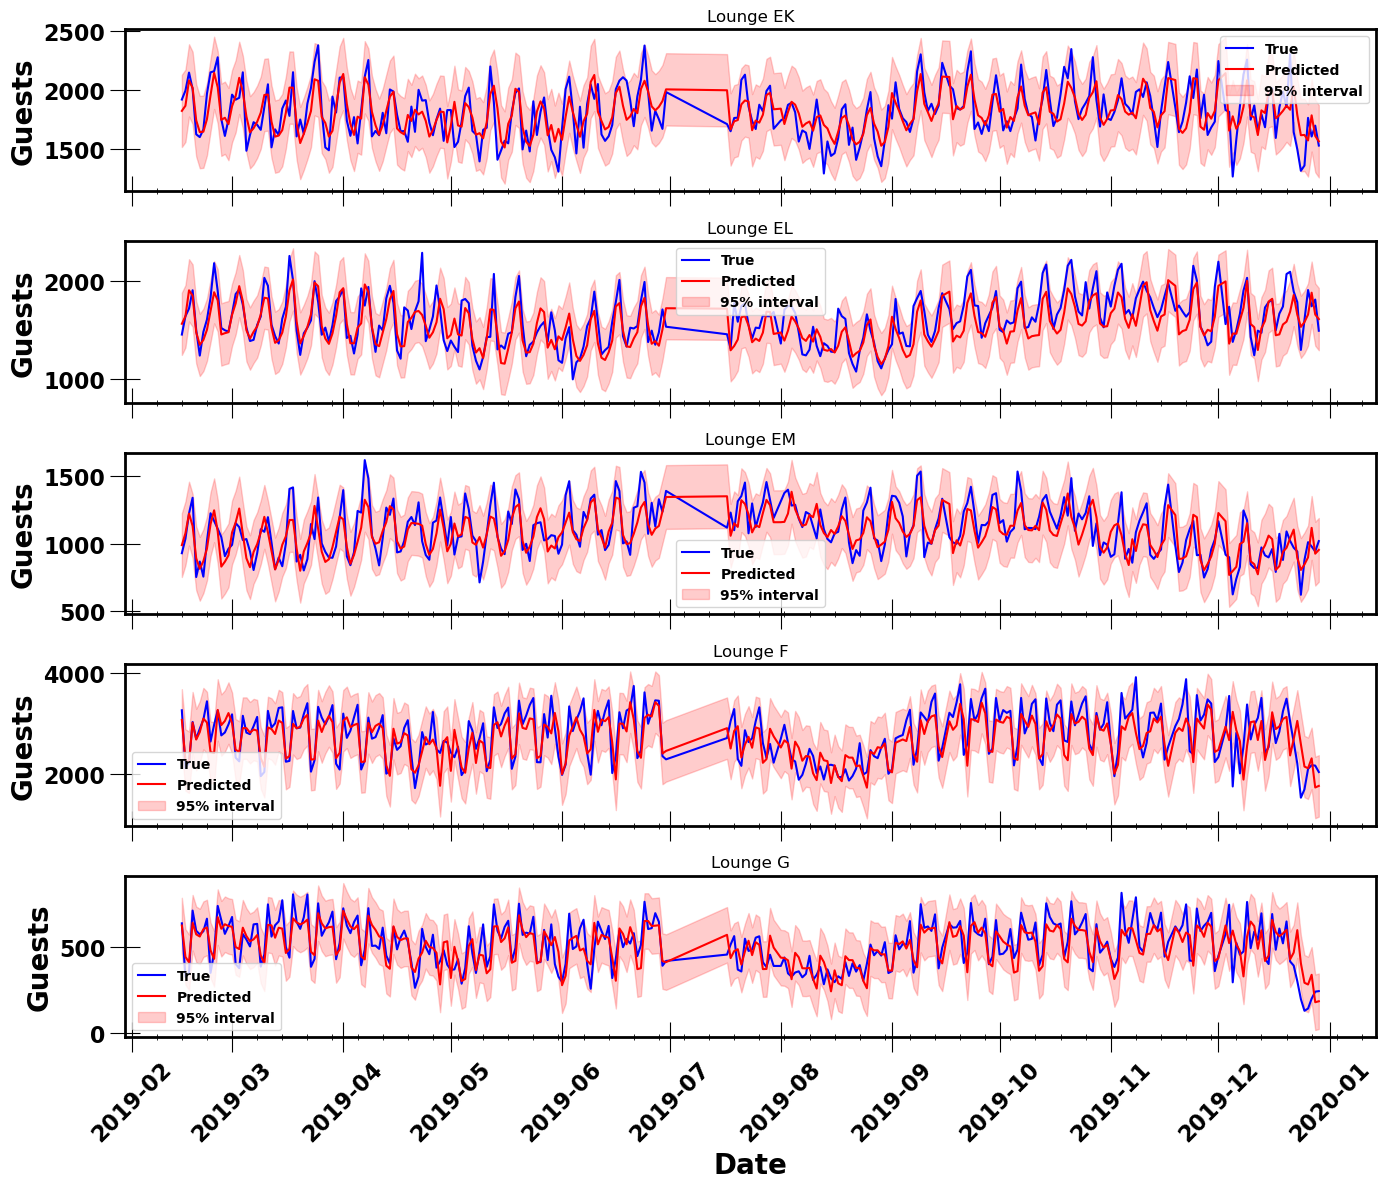

Forecast from 2019-12-29 to 2020-01-12


In [11]:
#Now that we have define everything, let run it.
configuration_plot()
df,df_holidays = load_and_preprocess_data('lounge_attendance', 'vacances')
lounges = ['EK', 'EL', 'EM', 'F', 'G']

max_lag_range = [1, 2, 3, 4, 5,10,20]
alpha_range = [1.0, 5, 10.0,50, 100.0,200]

max_lag, alpha = train_and_evaluate_model_hypertune(df, lounges,max_lag_range,alpha_range)
df_pred,rmse_lounges, r2_lounges,df_forecast = train_and_evaluate_model(df,df_holidays, lounges,max_lag=max_lag,alpha=alpha,plot=True, start_date='2019-12-29', end_date='2020-01-12')



# PART II: Provide your predictions for 14 days, from 2019-12-29 to 2020-01-12. It must be in the same format (e.g. the same 3 columns and their respective types) than lounge_attendance.csv

Now, we have our model, we can do forecasting

In [12]:
df_pred,rmse_lounges, r2_lounges,df_forecast = train_and_evaluate_model(df,df_holidays, lounges,max_lag=max_lag,alpha=alpha,plot=False, start_date='2019-12-29', end_date='2020-01-12')


RMSE value for EK is: 157.21231870990061
R2 value for EK is: 0.49980201134619273
RMSE value for EL is: 173.62783618685359
R2 value for EL is: 0.5397806815423741
RMSE value for EM is: 123.30455426645388
R2 value for EM is: 0.5706290122900546
RMSE value for F is: 319.2951938112139
R2 value for F is: 0.6022678833329288
RMSE value for G is: 82.6126779485933
R2 value for G is: 0.6247327185572705
Forecast from 2019-12-29 to 2020-01-12


/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [13]:
df_forecast

date lounge  guests  lower_bound  upper_bound
0  2019-12-29     EK    1803         1494         2111
1  2019-12-29     EL    1440         1120         1759
2  2019-12-29     EM     962          724         1199
3  2019-12-29      F    2894         2285         3503
4  2019-12-29      G     637          475          798
..        ...    ...     ...          ...          ...
70 2020-01-12     EK    1825         1516         2133
71 2020-01-12     EL    1397         1078         1716
72 2020-01-12     EM     972          734         1209
73 2020-01-12      F    3028         2419         3636
74 2020-01-12      G     620          458          781

[75 rows x 5 columns]

In [14]:
# Concatenate data and prediction to plot everything
df_data=pd.read_csv('data/lounge_attendance.csv', skiprows=1, names=['date', 'lounge', 'guests'])
df_tot=pd.concat([df_data, df_forecast[['date', 'lounge', 'guests']]], ignore_index=True)
df_tot['date']=pd.to_datetime(df_tot["date"])

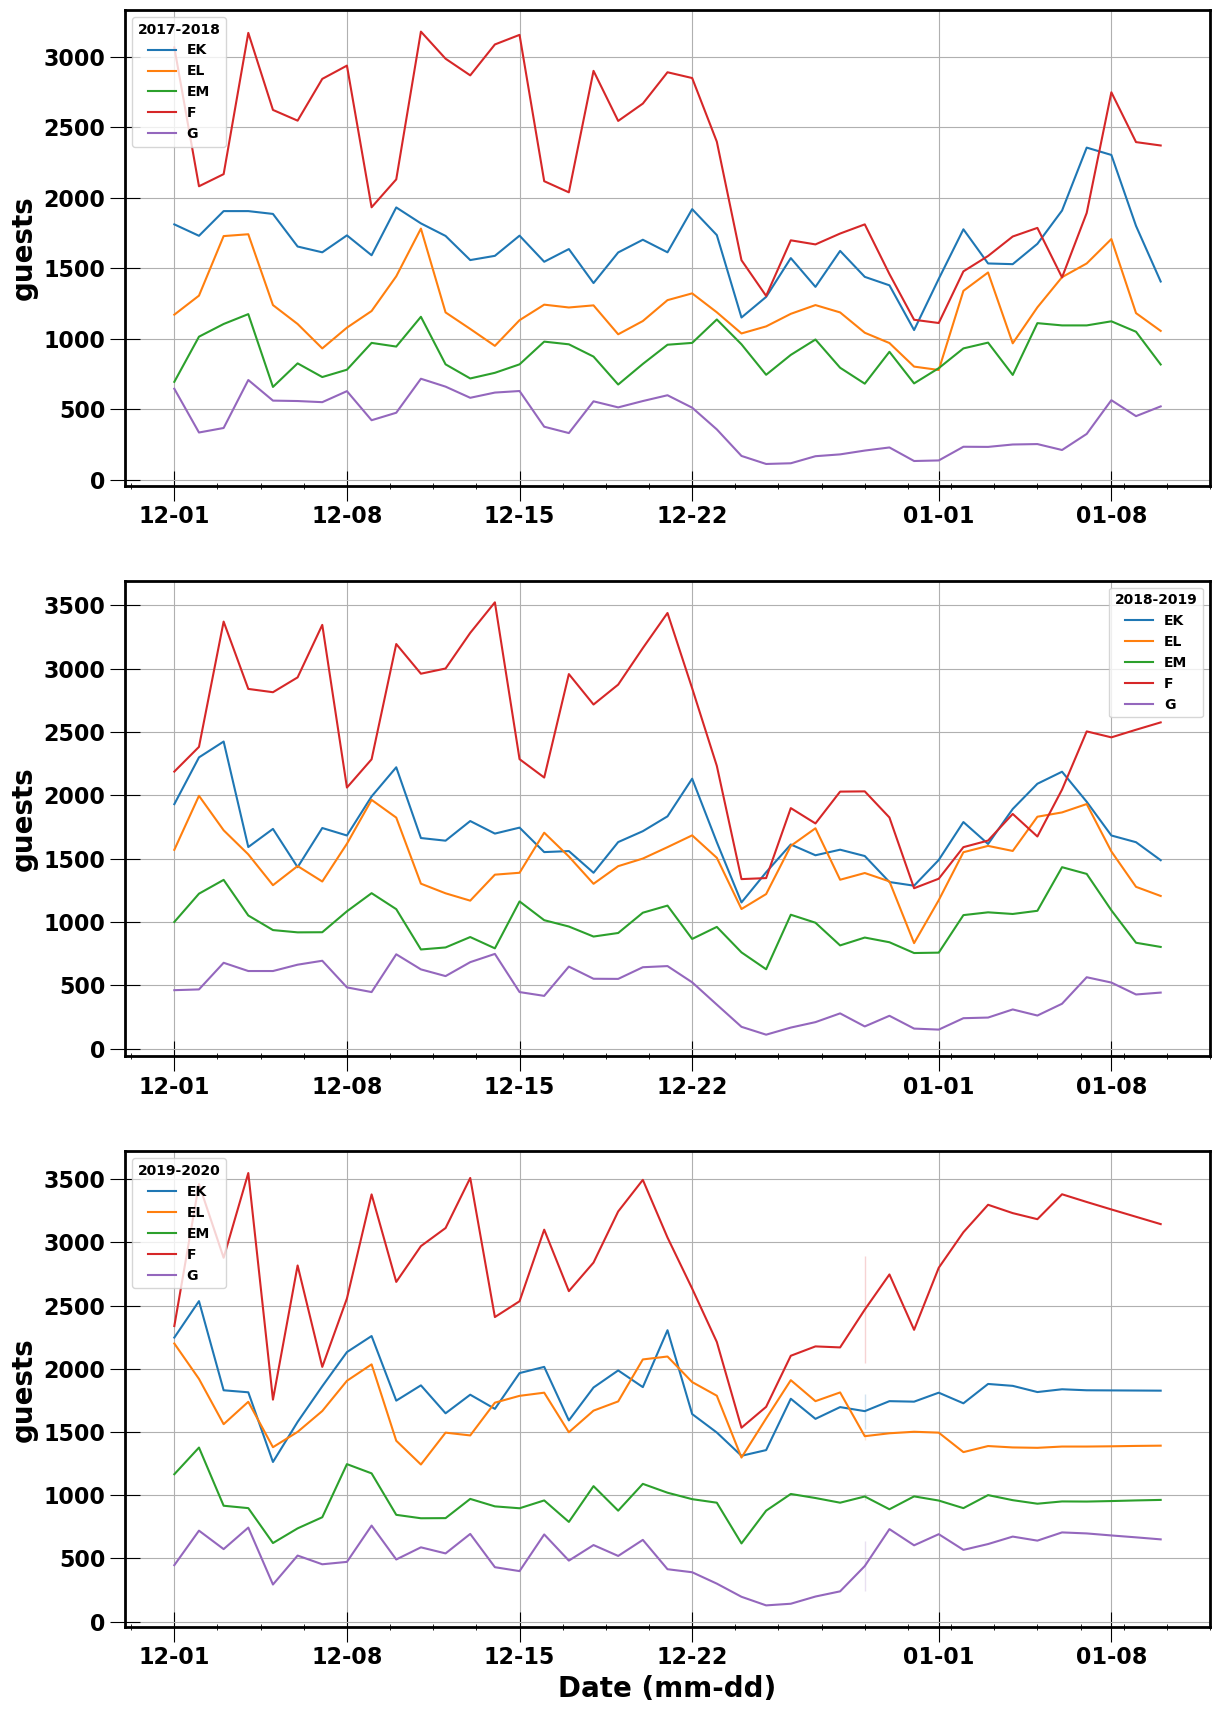

In [15]:
import seaborn as sn

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter the data for each specific date range
df_2017 = df_tot[(df_tot['date'] >= '2017-12-01') & (df_tot['date'] <= '2018-01-10')]
df_2018 = df_tot[(df_tot['date'] >= '2018-12-01') & (df_tot['date'] <= '2019-01-10')]
df_2019 = df_tot[(df_tot['date'] >= '2019-12-01') & (df_tot['date'] <= '2020-01-10')]

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 21))  # 3 subplots stacked vertically

# Define the date formatter for the x-axis to display only mm-dd
date_formatter = mdates.DateFormatter('%m-%d')

# Plot each subset in its respective subplot
sn.lineplot(ax=axes[0], data=df_2017, x='date', y='guests', hue='lounge', marker='None')
axes[0].xaxis.set_major_formatter(date_formatter)
axes[0].set_xlabel('')
axes[0].legend(title='2017-2018')
axes[0].grid(True)

sn.lineplot(ax=axes[1], data=df_2018, x='date', y='guests', hue='lounge', marker='None')
axes[1].xaxis.set_major_formatter(date_formatter)
axes[1].set_xlabel('')
axes[1].legend(title='2018-2019')
axes[1].grid(True)

sn.lineplot(ax=axes[2], data=df_2019, x='date', y='guests', hue='lounge', marker='None')
axes[2].xaxis.set_major_formatter(date_formatter)
axes[2].set_xlabel('Date (mm-dd)')
axes[2].legend(title='2019-2020')
axes[2].grid(True)

# Show the plot
plt.show()


**Conclusions**

In 2017-2018,2018-2019, for all the lounges, we see an increase/variation of the number of guests after the Christmas holidays (01/01). However, in forecast, we do not see any patterns, the forecast is pretty flat except for F. We use iterative forecasting, so if an error occurs early in the forecast, this error can propagate and amplify over time, leading to increasingly inaccurate predictions.


## Prophet

Prophet is a forecasting tool developed by Facebook, designed to handle time series data with seasonal patterns, missing data, outliers, and other complex structures commonly seen in real-world time series. 

In [16]:
configuration_plot()
import holidays

# Get US holidays
fr_holidays = holidays.FR(years=[2017,2018,2019])

# Convert to a DataFrame for Prophet
holiday = pd.DataFrame(list(fr_holidays.items()), columns=['ds', 'holiday'])

22:07:53 - cmdstanpy - INFO - Chain [1] start processing
22:07:54 - cmdstanpy - INFO - Chain [1] done processing
22:07:54 - cmdstanpy - INFO - Chain [1] start processing
22:07:54 - cmdstanpy - INFO - Chain [1] done processing
22:07:54 - cmdstanpy - INFO - Chain [1] start processing
22:07:54 - cmdstanpy - INFO - Chain [1] done processing
22:07:55 - cmdstanpy - INFO - Chain [1] start processing
22:07:55 - cmdstanpy - INFO - Chain [1] done processing
22:07:55 - cmdstanpy - INFO - Chain [1] start processing
22:07:55 - cmdstanpy - INFO - Chain [1] done processing


ds  predicted_guests
0 2019-12-29       1872.920054
1 2019-12-30       1961.109531
2 2019-12-31       1635.038248
3 2020-01-01       1620.665108
4 2020-01-02       1556.821607

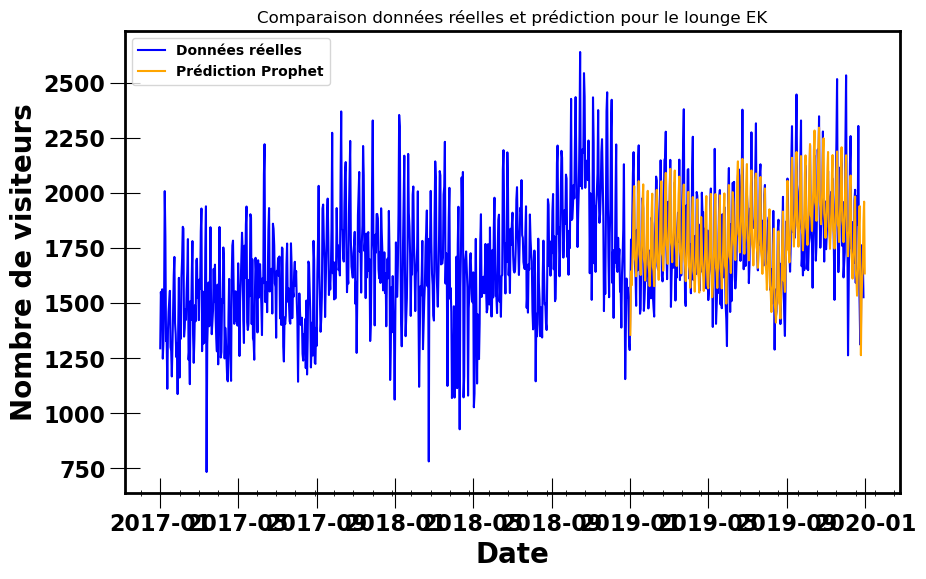

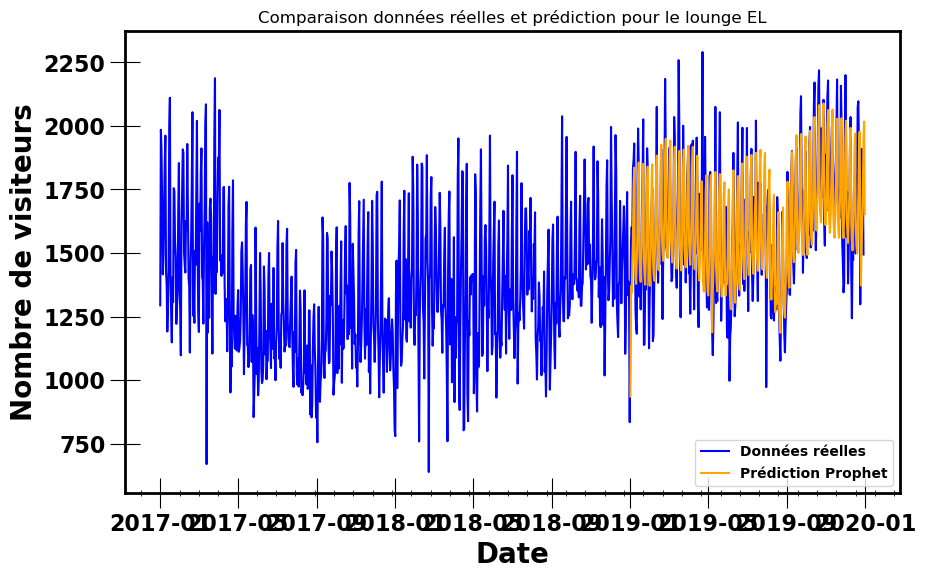

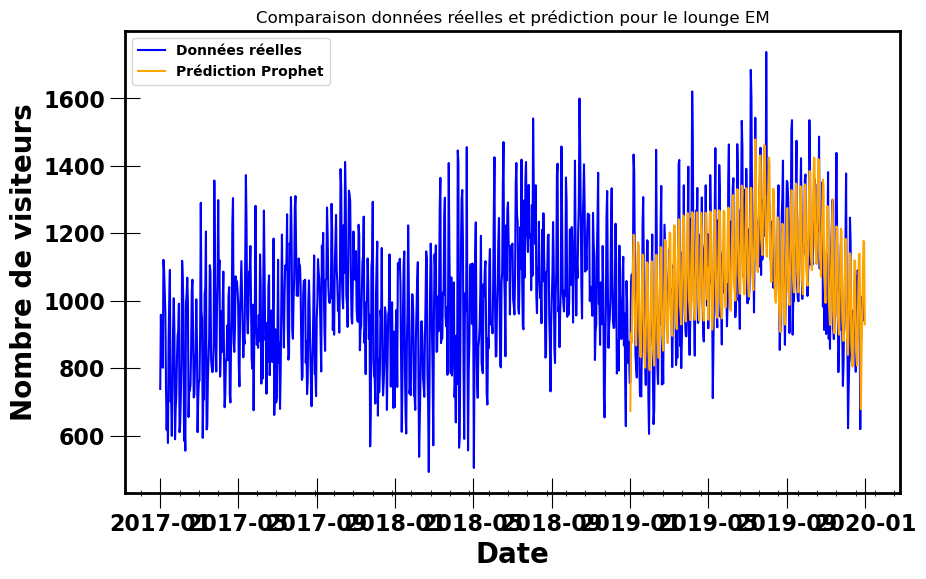

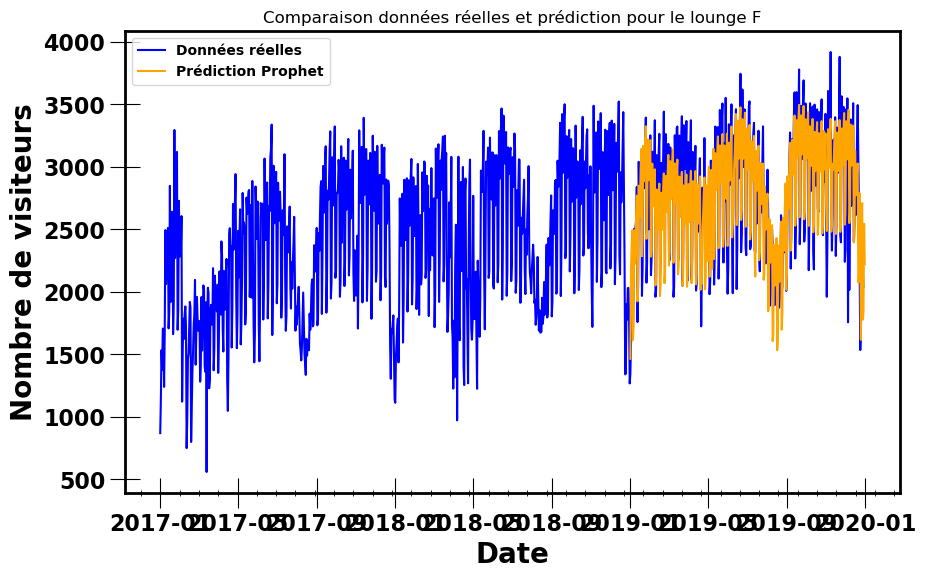

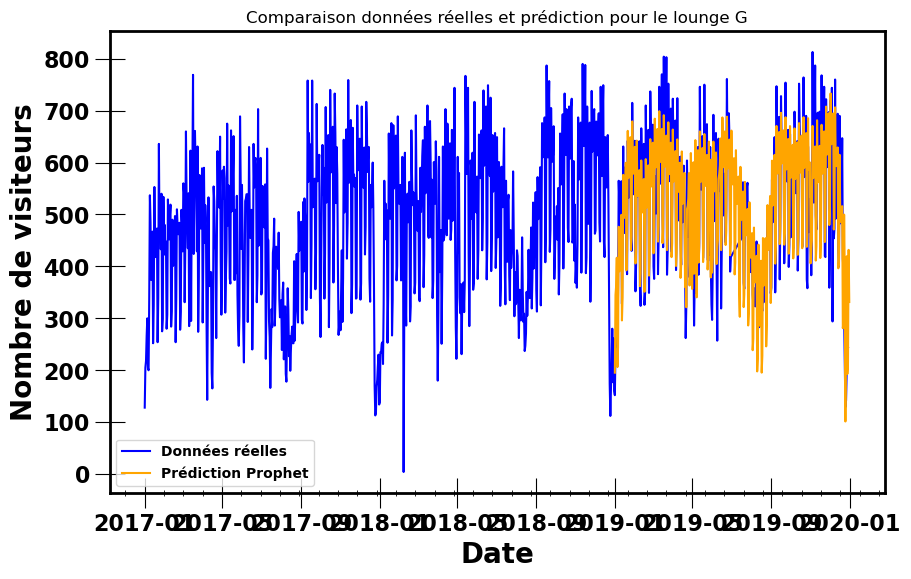

In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from prophet import Prophet
import matplotlib.dates as mdates
from prophet.diagnostics import cross_validation, performance_metrics

lounge_data = pd.read_csv('data/lounge_attendance.csv')


# Convert the date column to datetime format
lounge_data['date'] = pd.to_datetime(lounge_data['date'])

# Get the unique lounges
lounges = lounge_data['lounge_name'].unique()

# Create a dictionary to store models and forecasts for each lounge
forecasts = {}
forecasts_data = {}


# Set the prediction period
future_dates = pd.date_range(start='2019-12-29', end='2020-01-12')

old_dates = pd.date_range(start='2019-01-01', end='2019-12-31')


# Loop through each lounge and create a forecast
for lounge in lounges:
    # Filter the data for the current lounge
    lounge_df = lounge_data[lounge_data['lounge_name'] == lounge][['date', 'total_guests']]
    
    # Rename columns to fit Prophet's expected input format
    lounge_df = lounge_df.rename(columns={'date': 'ds', 'total_guests': 'y'})
    
    # Initialize and fit the model
    model = Prophet(holidays=holiday)
    model.fit(lounge_df)

    
    # Create a dataframe to hold future dates
    future = pd.DataFrame({'ds': future_dates})
    old_pred = pd.DataFrame({'ds': old_dates})

    
    # Predict future values
    forecast = model.predict(future)
    forecast_old = model.predict(old_pred)

    
    # Store the forecast for the lounge
    forecasts[lounge] = forecast[['ds', 'yhat']].rename(columns={'yhat': 'predicted_guests'})
    forecasts_data[lounge] = forecast_old[['ds', 'yhat']].rename(columns={'yhat': 'predicted_guests'})

    # Tracer les données réelles et la prédiction
    plt.figure(figsize=(10, 6))
    plt.plot(lounge_df['ds'], lounge_df['y'], label='Données réelles', color='blue')
    plt.plot(forecasts_data[lounge]['ds'], forecasts_data[lounge]['predicted_guests'], label='Prédiction Prophet', color='orange')
    plt.title(f'Comparaison données réelles et prédiction pour le lounge {lounge}')
    plt.xlabel('Date')
    plt.ylabel('Nombre de visiteurs')
    plt.legend()

# Display the forecast for one lounge as an example (lounge 'EK')
forecasts['EK'].head()


In [30]:
forecasts_data['EK'].ds

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
360   2019-12-27
361   2019-12-28
362   2019-12-29
363   2019-12-30
364   2019-12-31
Name: ds, Length: 365, dtype: datetime64[ns]

In [18]:
forecast_list = []

for lounge in lounges:
    forecast_df = forecasts[lounge]
    forecast_df['lounge'] = lounge
    forecast_df = forecast_df.rename(columns={'ds': 'date', 'predicted_guests': 'guests'})
    forecast_list.append(forecast_df[['date', 'lounge', 'guests']])

# Combine all the forecasts into one dataframe
forecasted_data = pd.concat(forecast_list).reset_index(drop=True)
forecasted_data

date lounge       guests
0  2019-12-29     EK  1872.920054
1  2019-12-30     EK  1961.109531
2  2019-12-31     EK  1635.038248
3  2020-01-01     EK  1620.665108
4  2020-01-02     EK  1556.821607
..        ...    ...          ...
70 2020-01-08      G   385.571903
71 2020-01-09      G   411.624875
72 2020-01-10      G   473.792587
73 2020-01-11      G   269.948428
74 2020-01-12      G   313.735166

[75 rows x 3 columns]

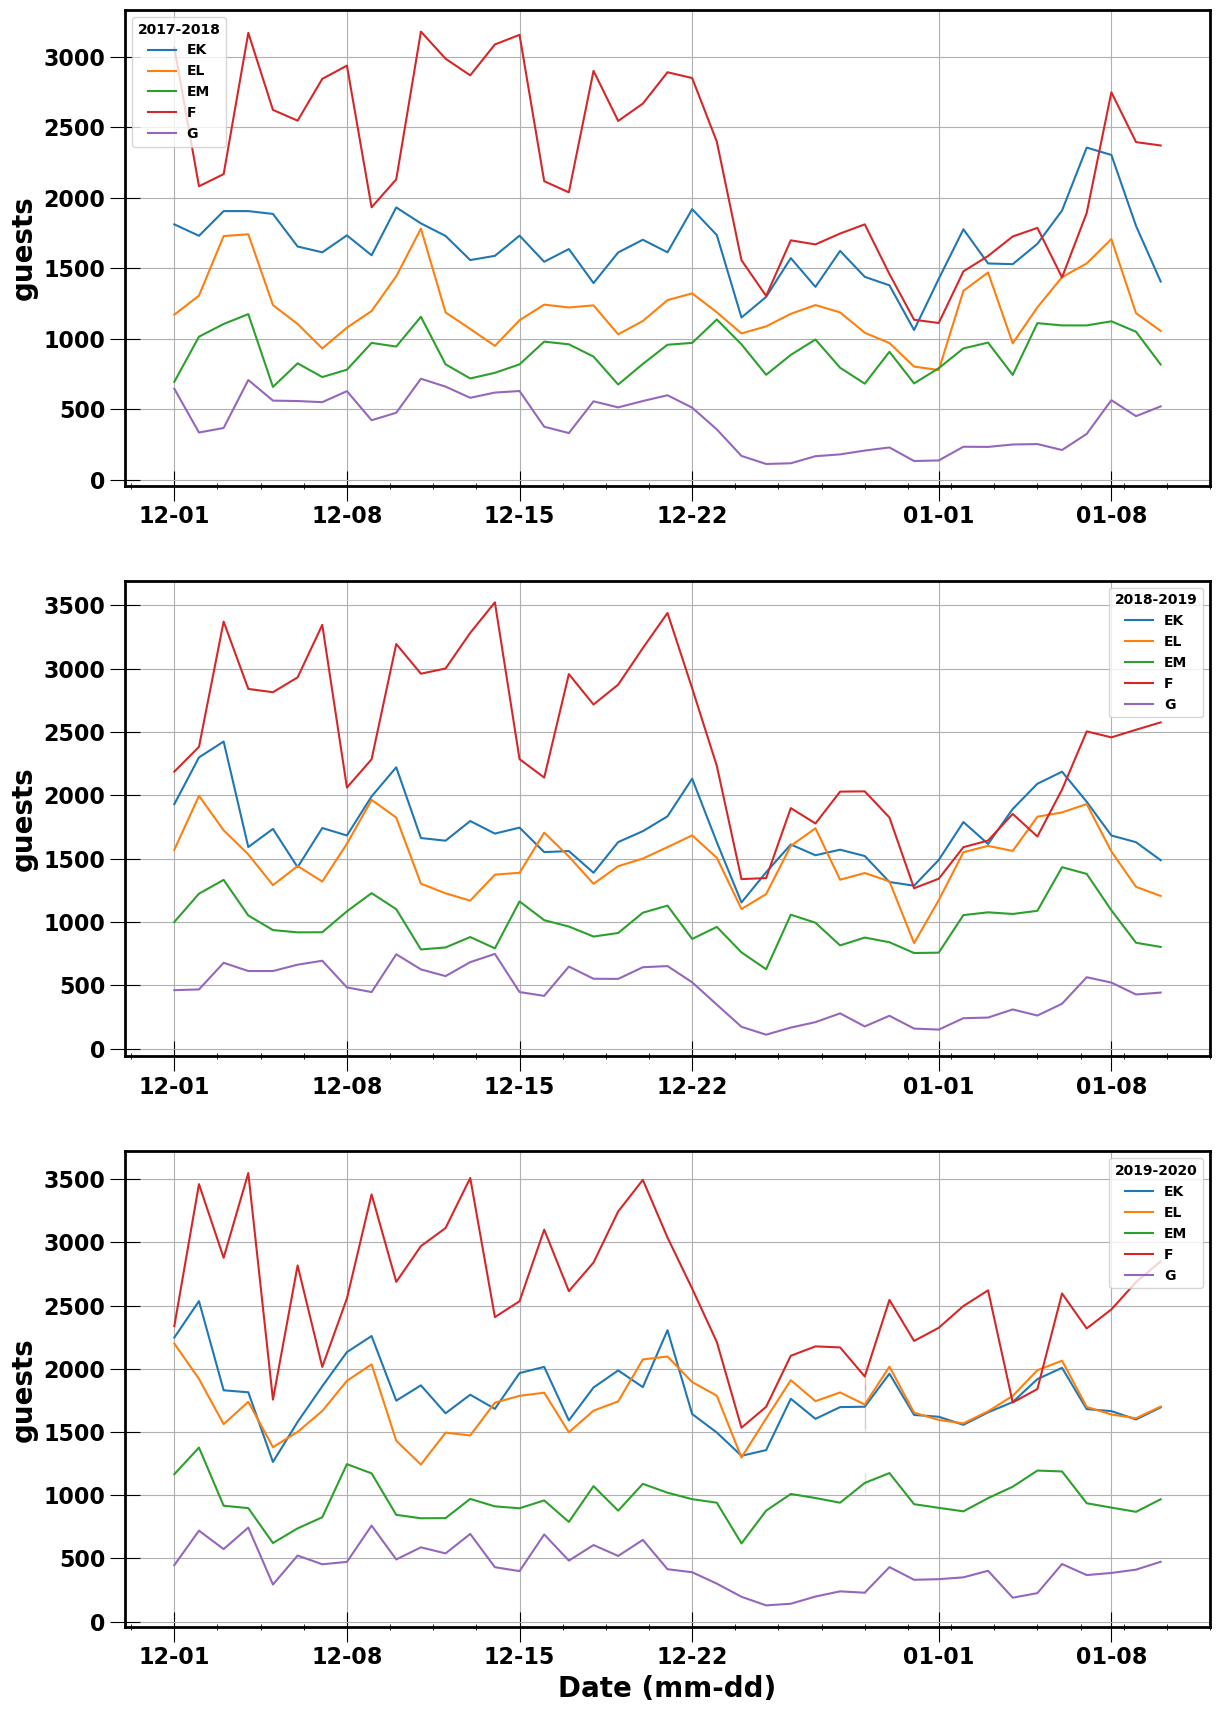

In [19]:
# Concatenate data and prediction to plot everything
df_data=pd.read_csv('data/lounge_attendance.csv', skiprows=1, names=['date', 'lounge', 'guests'])
df_prophet=pd.concat([df_data, forecasted_data[['date', 'lounge', 'guests']]], ignore_index=True)
df_prophet['date']=pd.to_datetime(df_prophet["date"])

# Filter the data for each specific date range
df_2017_prophet = df_prophet[(df_prophet['date'] >= '2017-12-01') & (df_prophet['date'] <= '2018-01-10')]
df_2018_prophet = df_prophet[(df_prophet['date'] >= '2018-12-01') & (df_prophet['date'] <= '2019-01-10')]
df_2019_prophet = df_prophet[(df_prophet['date'] >= '2019-12-01') & (df_prophet['date'] <= '2020-01-10')]

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 21))  # 3 subplots stacked vertically

# Define the date formatter for the x-axis to display only mm-dd
date_formatter = mdates.DateFormatter('%m-%d')

# Plot each subset in its respective subplot
sn.lineplot(ax=axes[0], data=df_2017_prophet, x='date', y='guests', hue='lounge', marker='None')
axes[0].xaxis.set_major_formatter(date_formatter)
axes[0].set_xlabel('')
axes[0].legend(title='2017-2018')
axes[0].grid(True)

sn.lineplot(ax=axes[1], data=df_2018_prophet, x='date', y='guests', hue='lounge', marker='None')
axes[1].xaxis.set_major_formatter(date_formatter)
axes[1].set_xlabel('')
axes[1].legend(title='2018-2019')
axes[1].grid(True)

sn.lineplot(ax=axes[2], data=df_2019_prophet, x='date', y='guests', hue='lounge', marker='None')
axes[2].xaxis.set_major_formatter(date_formatter)
axes[2].set_xlabel('Date (mm-dd)')
axes[2].legend(title='2019-2020')
axes[2].grid(True)

# Show the plot
plt.show()